In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# load data

In [ ]:
!pip install ucimlrepo

In [ ]:
!pip install numpy --upgrade

  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.19.0 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.19.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have ten

In [ ]:
#calling uci repo for EEG
from ucimlrepo import fetch_ucirepo

# fetch dataset
eeg_eye_state = fetch_ucirepo(id=264)

# data (as pandas dataframes)
X = eeg_eye_state.data.features
y = eeg_eye_state.data.targets

# metadata
print(eeg_eye_state.metadata)

# variable information
print(eeg_eye_state.variables)


{'uci_id': 264, 'name': 'EEG Eye State', 'repository_url': 'https://archive.ics.uci.edu/dataset/264/eeg+eye+state', 'data_url': 'https://archive.ics.uci.edu/static/public/264/data.csv', 'abstract': 'The data set consists of 14 EEG values and a value indicating the eye state.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 14980, 'num_features': 14, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['eyeDetection'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Thu Mar 21 2024', 'dataset_doi': '10.24432/C57G7J', 'creators': ['Oliver Roesler'], 'intro_paper': None, 'additional_info': {'summary': "All data is from one continuous EEG measurement with the Emotiv EEG Neuroheadset. The duration of the measurement was 117 seconds. The eye state was detected via a camera during the EEG measuremen

# Export full data .csv

In [ ]:
#TODO:placeholder for saved .csv location
#full data csv
full_data = eeg_eye_state.data.original
full_data.to_csv('eeg_eye_state.csv',index=False,header=True)

In [ ]:
full_data.head()

AF3       F7       F3      FC5       T7       P7       O1       O2  \
0  4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
1  4324.62  4004.62  4293.85  4148.72  4342.05  4586.67  4097.44  4638.97   
2  4327.69  4006.67  4295.38  4156.41  4336.92  4583.59  4096.92  4630.26   
3  4328.72  4011.79  4296.41  4155.90  4343.59  4582.56  4097.44  4630.77   
4  4326.15  4011.79  4292.31  4151.28  4347.69  4586.67  4095.90  4627.69   

        P8       T8      FC6       F4       F8      AF4  eyeDetection  
0  4222.05  4238.46  4211.28  4280.51  4635.90  4393.85             0  
1  4210.77  4226.67  4207.69  4279.49  4632.82  4384.10             0  
2  4207.69  4222.05  4206.67  4282.05  4628.72  4389.23             0  
3  4217.44  4235.38  4210.77  4287.69  4632.31  4396.41             0  
4  4210.77  4244.10  4212.82  4288.21  4632.82  4398.46             0

In [ ]:
X.head()

AF3       F7       F3      FC5       T7       P7       O1       O2  \
0  4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
1  4324.62  4004.62  4293.85  4148.72  4342.05  4586.67  4097.44  4638.97   
2  4327.69  4006.67  4295.38  4156.41  4336.92  4583.59  4096.92  4630.26   
3  4328.72  4011.79  4296.41  4155.90  4343.59  4582.56  4097.44  4630.77   
4  4326.15  4011.79  4292.31  4151.28  4347.69  4586.67  4095.90  4627.69   

        P8       T8      FC6       F4       F8      AF4  
0  4222.05  4238.46  4211.28  4280.51  4635.90  4393.85  
1  4210.77  4226.67  4207.69  4279.49  4632.82  4384.10  
2  4207.69  4222.05  4206.67  4282.05  4628.72  4389.23  
3  4217.44  4235.38  4210.77  4287.69  4632.31  4396.41  
4  4210.77  4244.10  4212.82  4288.21  4632.82  4398.46

In [ ]:
# EDA

In [ ]:

#EDA
number_samples = X.shape[0]
number_features = X.shape[1]
print(f'# of samples: {number_samples}')
print(f'# of features: {number_features}')
unique_labels = y.nunique()
print(f'unique labels: {unique_labels}') #1' indicates the eye-closed and '0' the eye-open state
#checking NaN
print(f'NaN values: {X.isna().sum().sum()}')

# of samples: 14980
# of features: 14
unique labels: eyeDetection    2
dtype: int64
NaN values: 0


In [ ]:
#vidualize data
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

duration = 117 #seconds
# sampling_rate = 128 #samples per second

# timestamps = np.linspace(0, duration, num=number_samples)
timestamps = np.arange(0,number_samples)*duration
X['Timestamp'] = timestamps

# from statsmodels.tsa.seasonal import seasonal_decompose

# plt.figure(figsize=(10, 6))
# sns.lineplot(x='Timestamp', y=X['AF3'], data=X, color='blue', label='Fp1')
# sns.lineplot(x='Timestamp', y='Fp2', data=X, color='green', label='Fp2')







In [ ]:
print(X.columns)

Index(['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6',
       'F4', 'F8', 'AF4', 'Timestamp'],
      dtype='object')


In [ ]:
import pandas as pd
melt_data = pd.melt(X, id_vars=['Timestamp'], value_vars=X.columns, value_name='Value')
melt_data.head()

Timestamp variable    Value
0          0      AF3  4329.23
1        117      AF3  4324.62
2        234      AF3  4327.69
3        351      AF3  4328.72
4        468      AF3  4326.15

In [ ]:
# plt.figure(figsize=(15, 8))  # Adjust figure size as needed

# sns.lineplot(x='variable', y='Value', hue='Timestamp', data=melt_data, marker='o')

# plt.xlabel('EEG Feature')
# plt.ylabel('EEG Signal Value')
# plt.title('EEG Signals Over Time')
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
# plt.legend(title='Timestamp')
# plt.grid(True)
# plt.tight_layout()  # Adjust layout to prevent labels from overlapping
# plt.show()

<Axes: xlabel='Timestamp', ylabel='AF3'>

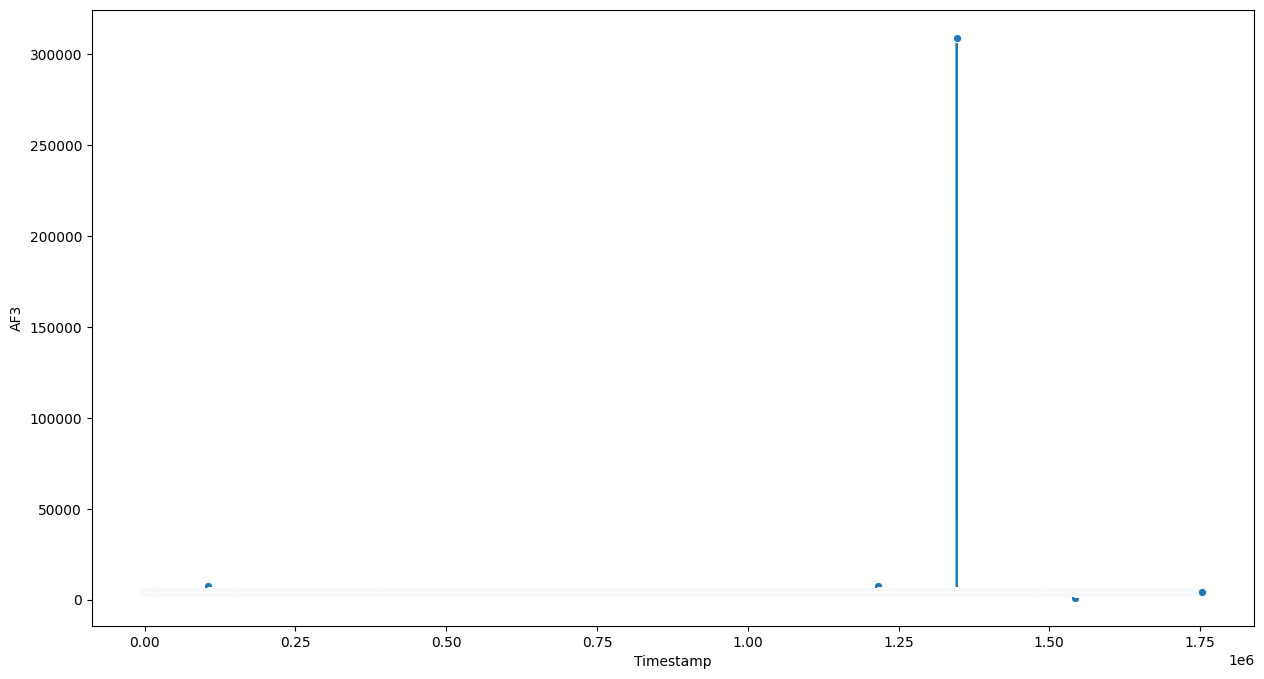

In [ ]:
#plotting x-axis with time stamps, y-axis as features value. And different features should have different colors
plt.figure(figsize=(15, 8))  # Adjust figure size as needed

sns.lineplot(x='Timestamp', y='AF3', data=X, marker='o')

In [ ]:
af3 = X.copy()
#af3['AF3'][11509] = af3['AF3'][11508] #using previous value for removing outlier

import numpy
def movingaverage(interval, window_size):
    window= numpy.ones(int(window_size))/float(window_size)
    return numpy.convolve(interval, window, 'same')

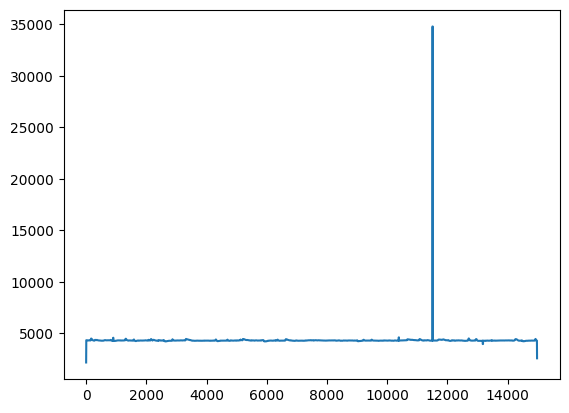

In [ ]:
plt.plot(movingaverage(af3['AF3'], 10))

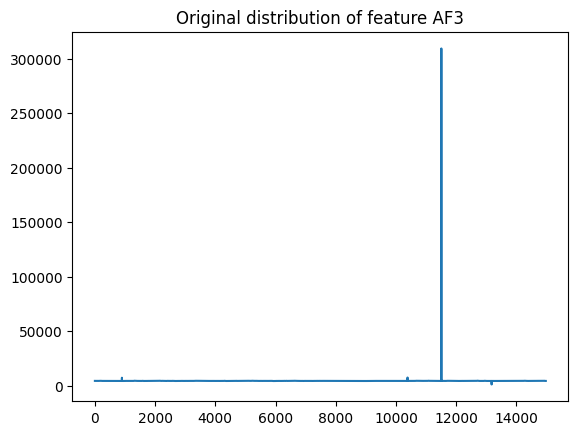

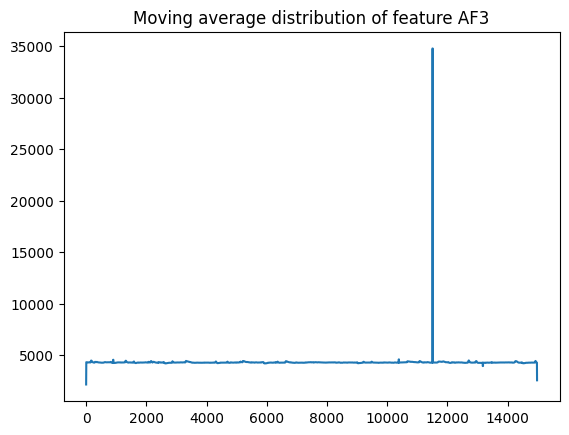

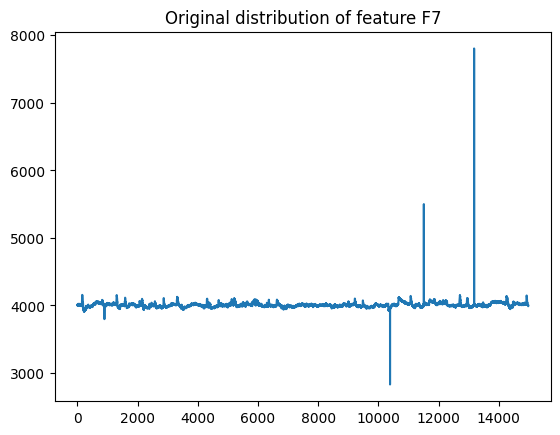

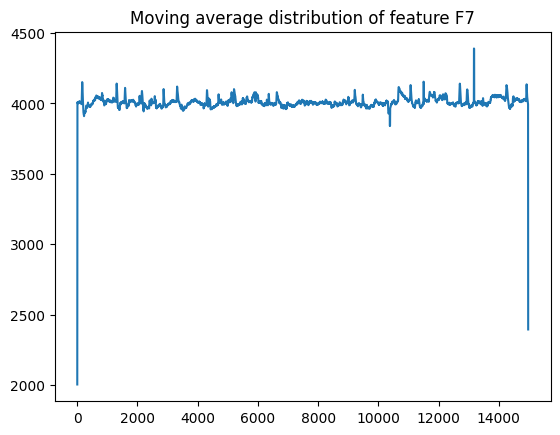

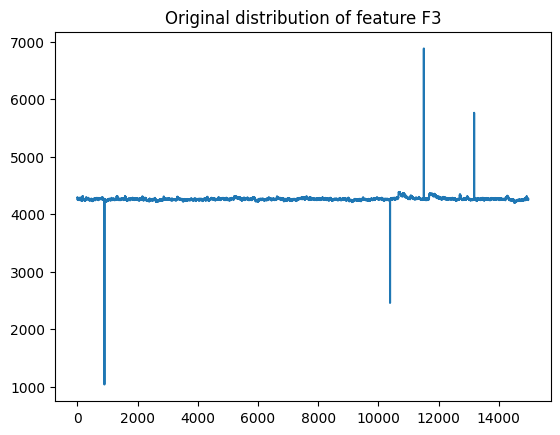

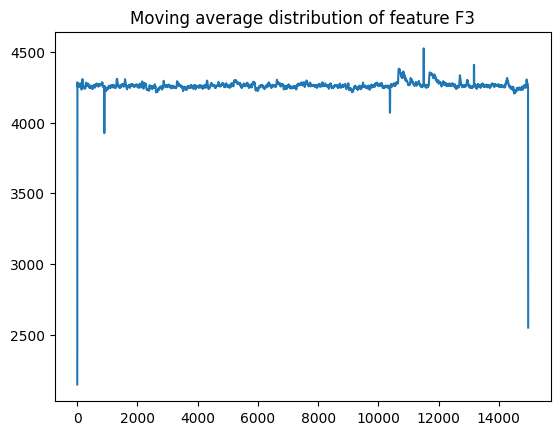

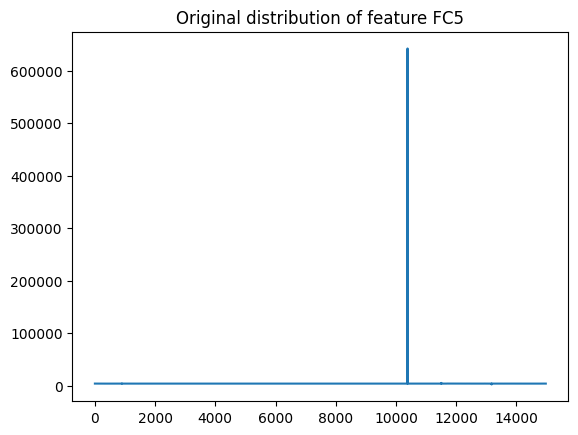

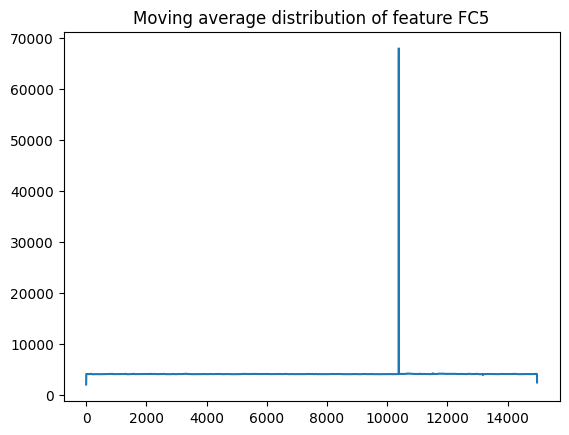

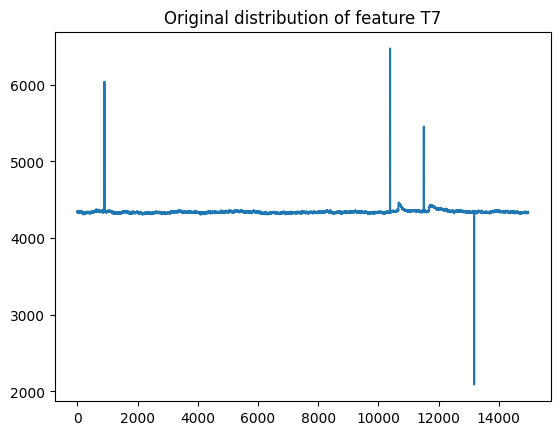

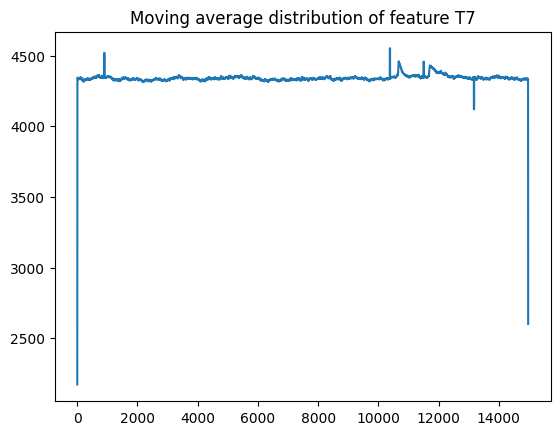

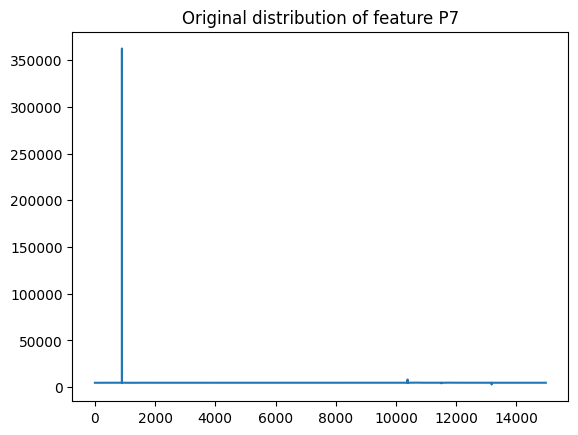

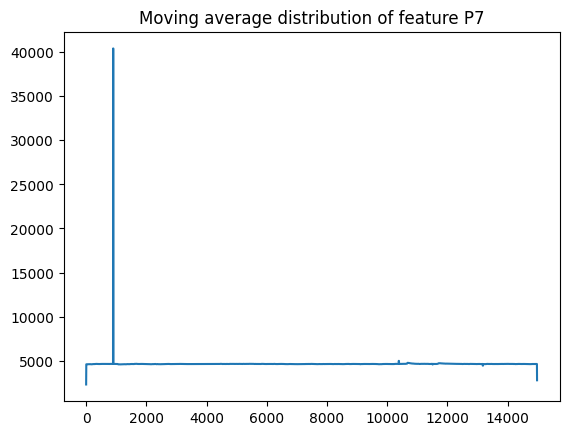

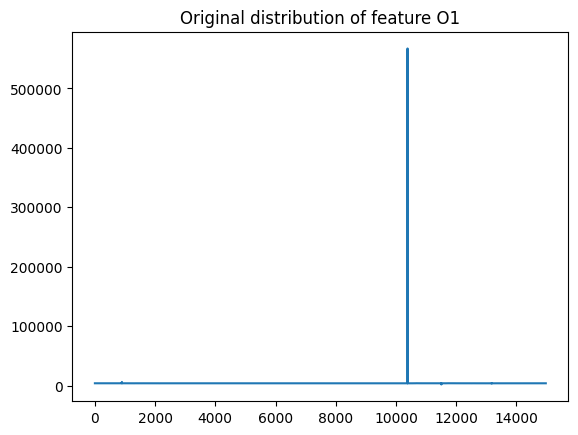

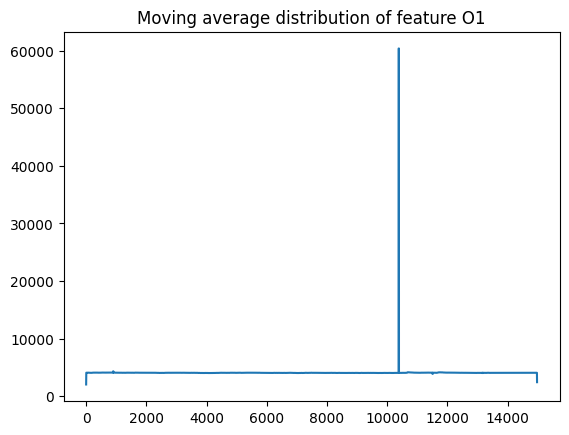

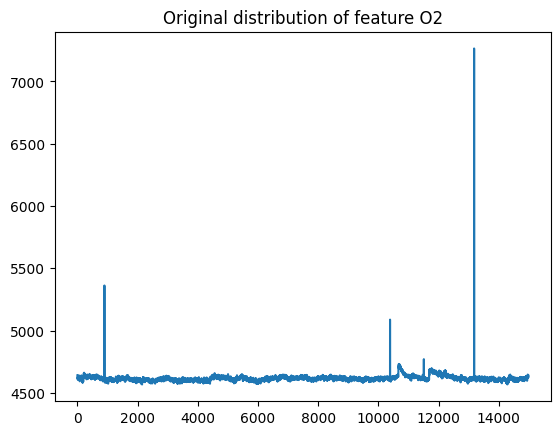

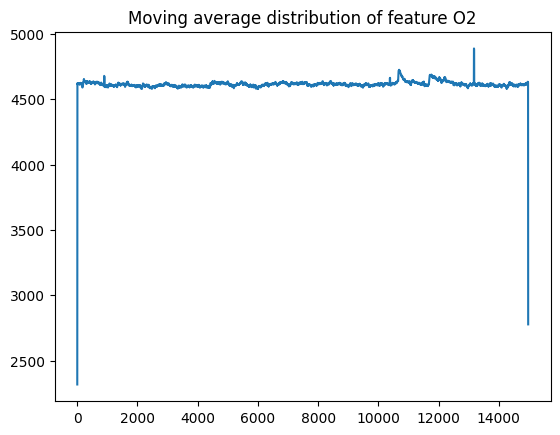

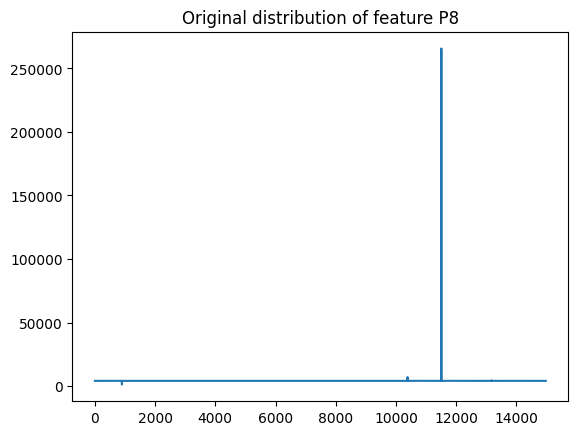

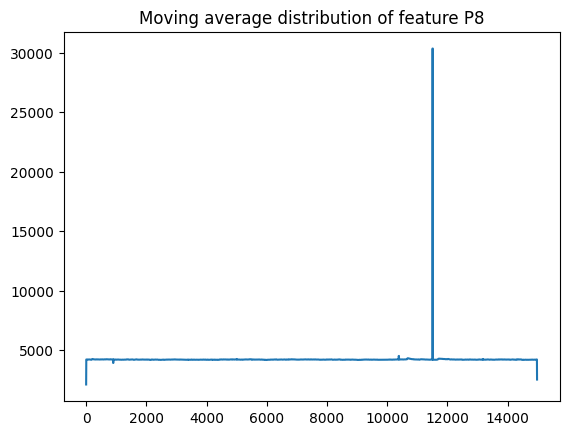

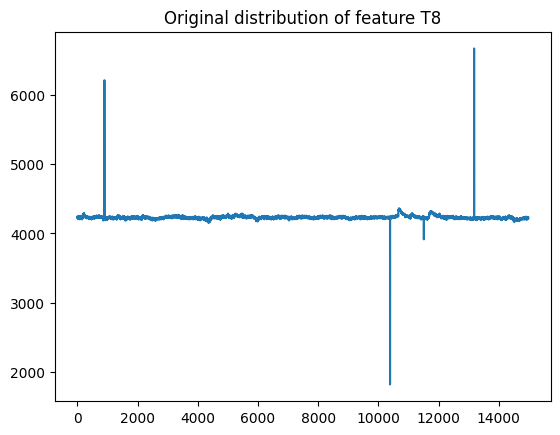

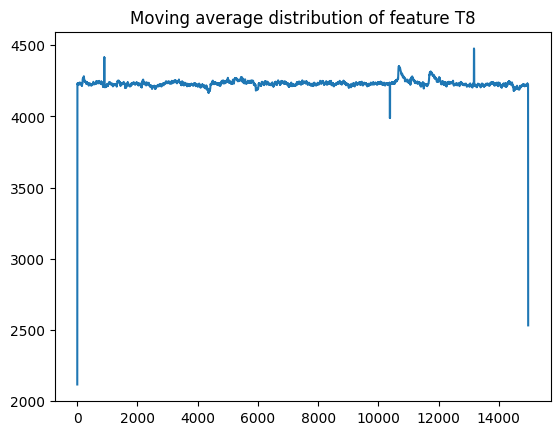

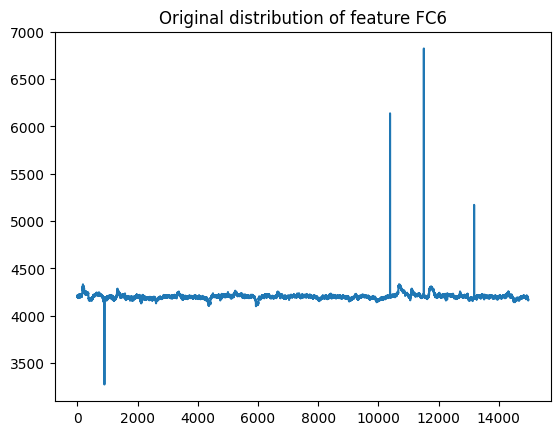

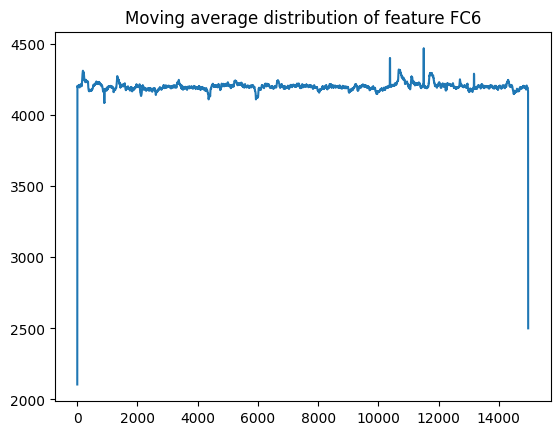

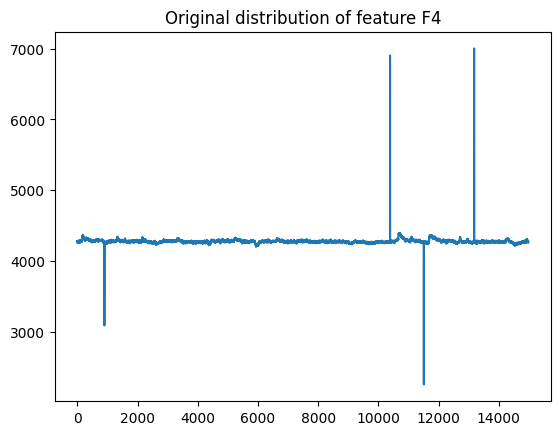

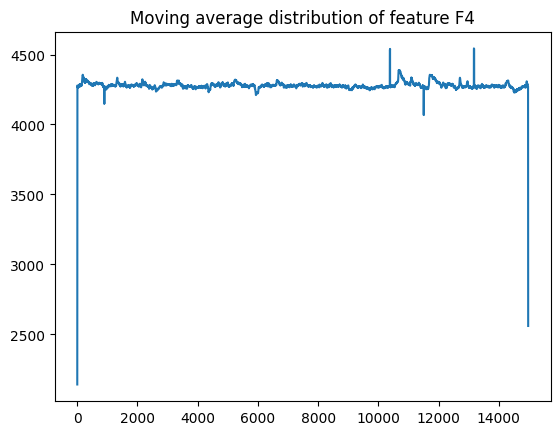

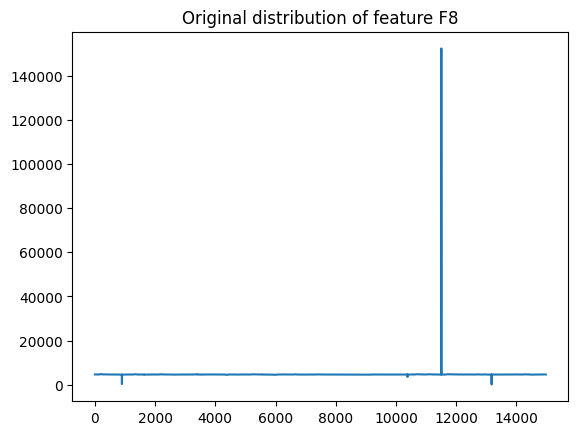

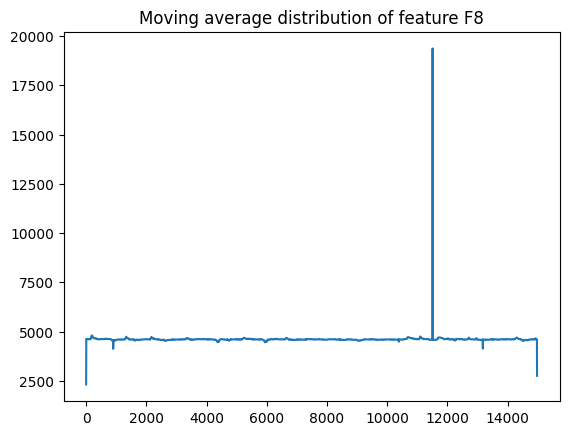

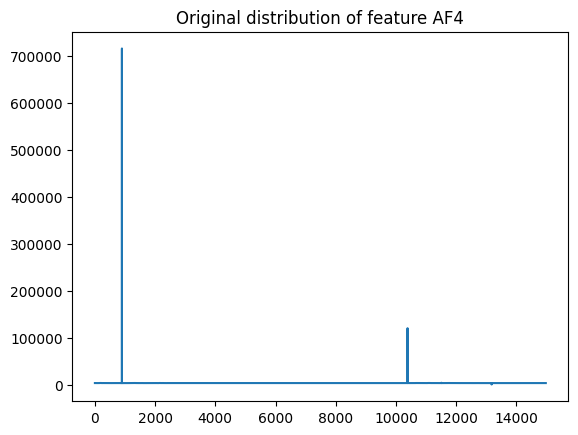

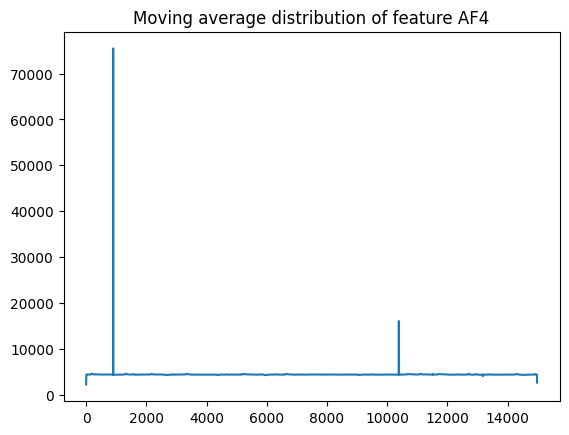

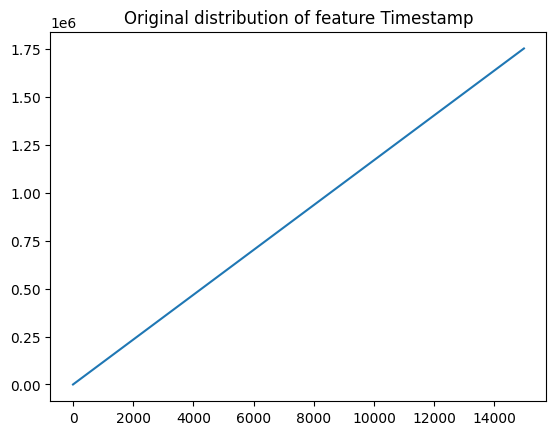

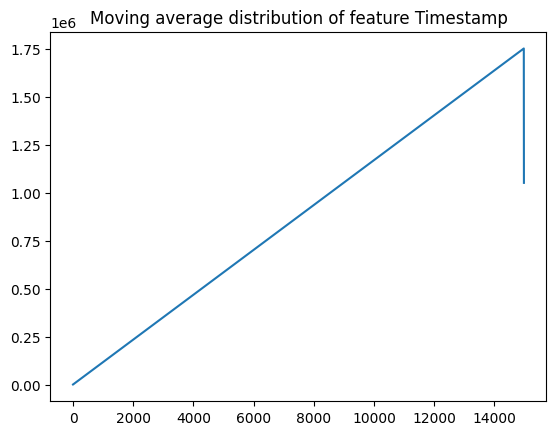

In [ ]:
#columns:'AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6',
#        'F4', 'F8', 'AF4', 'Timestamp'],
#       dtype='object')
def plot_data(feature_name, original=True):
    temp = X.copy()

    if original:
        plt.plot(temp[feature_name])
        plt.title(f'Original distribution of feature {feature_name}')
    else:
        plt.plot(movingaverage(temp[feature_name], 10))
        plt.title(f'Moving average distribution of feature {feature_name}')
    plt.show()

for feature in X.columns:
  plot_data(feature)
  plot_data(feature, False)

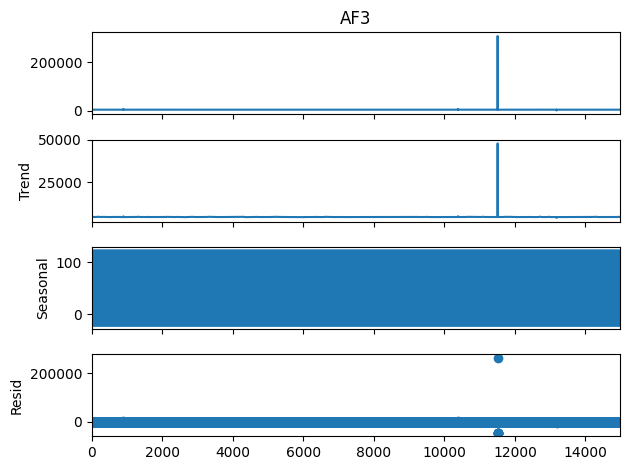

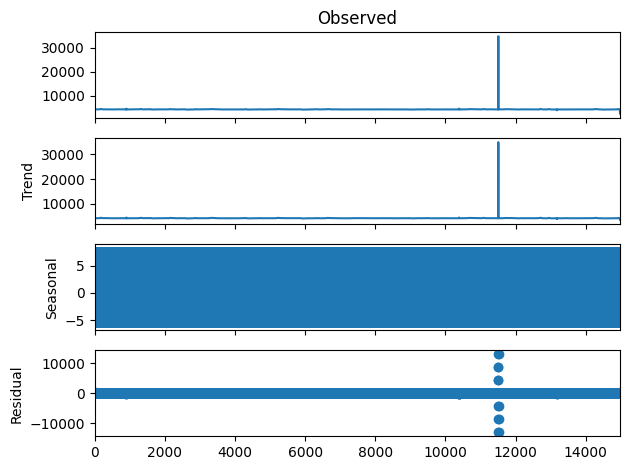

In [ ]:
#decomposing moving averaged data
from statsmodels.tsa.seasonal import seasonal_decompose
result_org = seasonal_decompose(X['AF3'],period=7,model='additive')
result_org.plot()
plt.show()

result_mvAvg = seasonal_decompose(movingaverage(X['AF3'],10),period=7,model='additive')
result_mvAvg.plot()
plt.show()

In [ ]:
import pandas as pd
def plot_seasonal_components(arr,feature_name,original=True):
    if not original:  # If it's moving average data
        arr = pd.Series(arr, name=feature_name)  # Convert to Series and assign name
    result= seasonal_decompose(arr,period=7,model='additive')
    result.plot()
    plt.show()
# plot_seasonal_components(X['AF3'],'AF3')
# plot_seasonal_components(movingaverage(X['AF3'],10),'AF3',False)

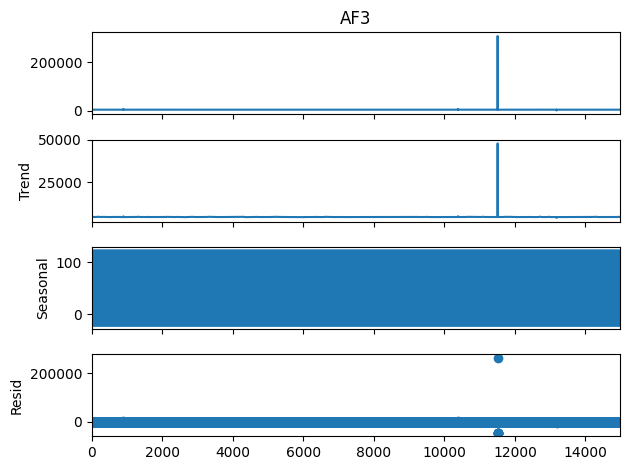

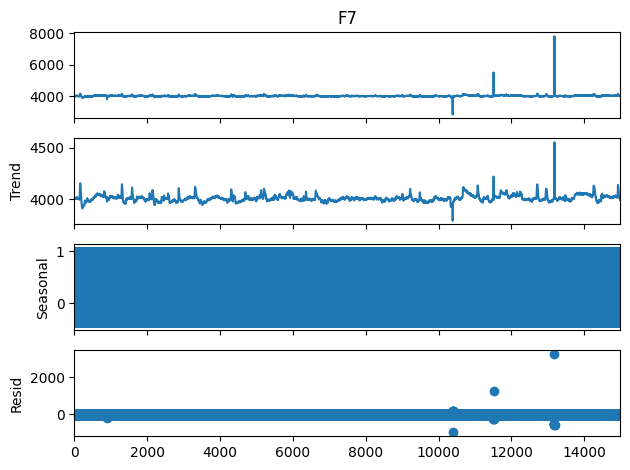

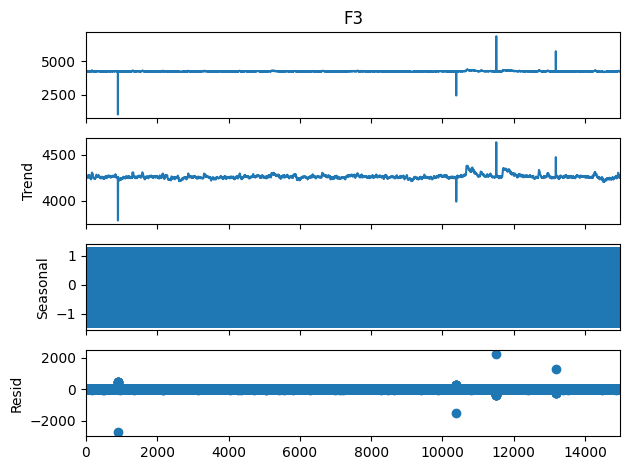

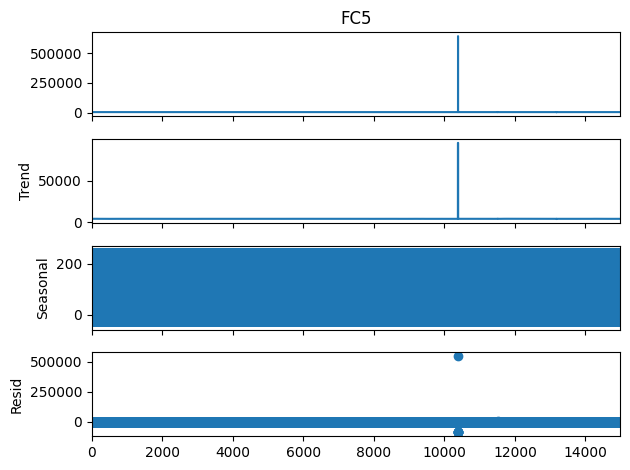

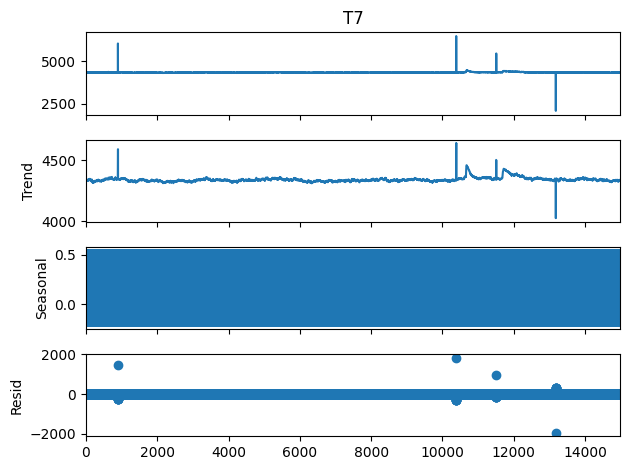

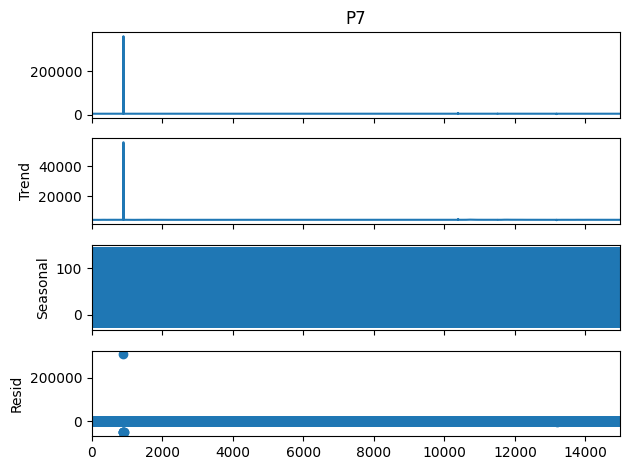

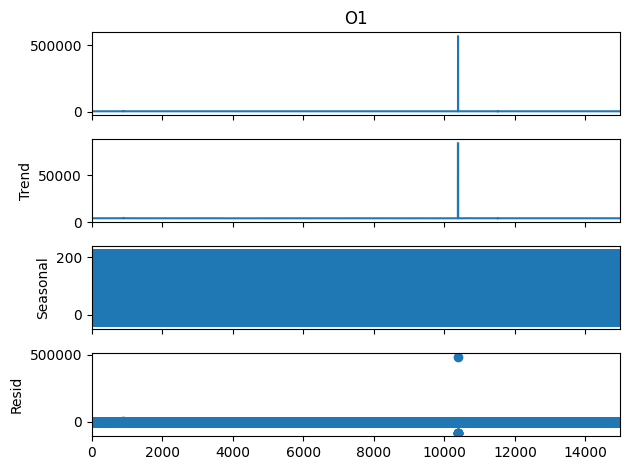

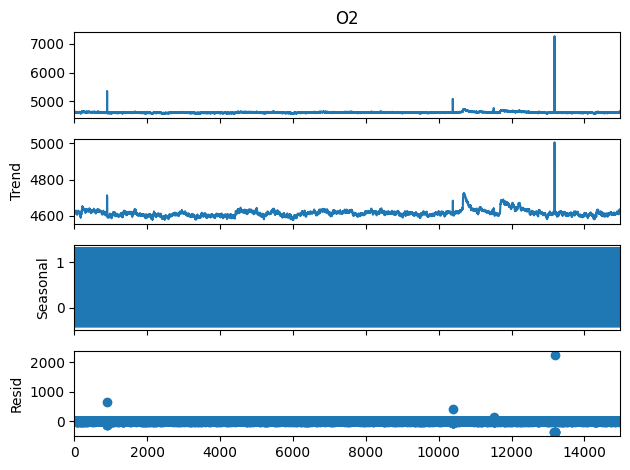

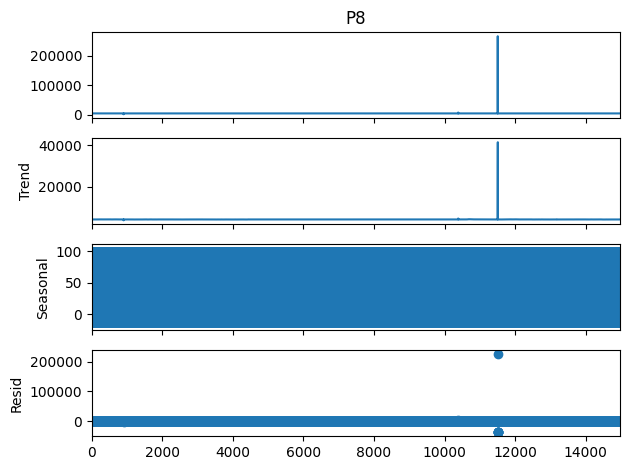

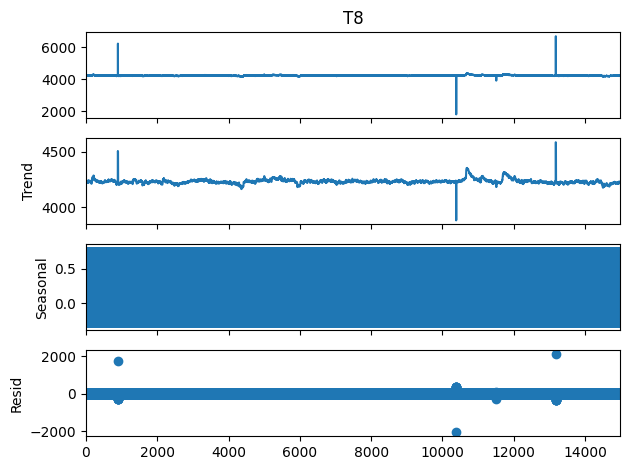

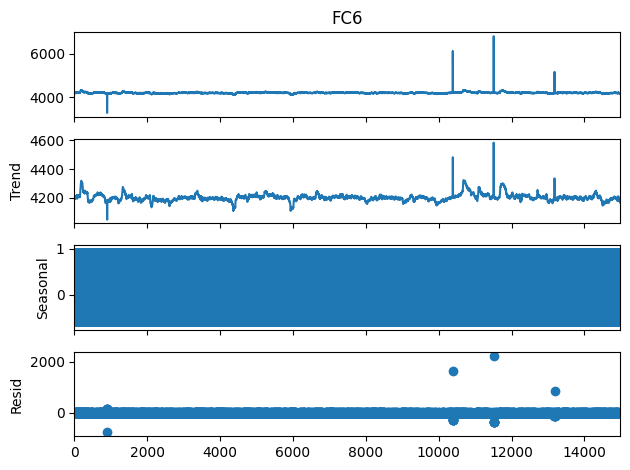

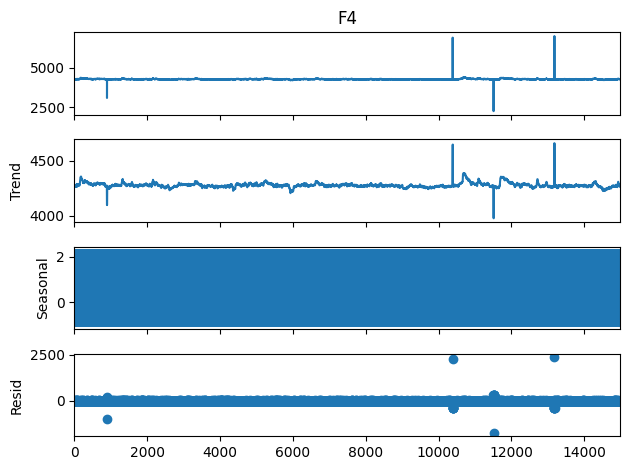

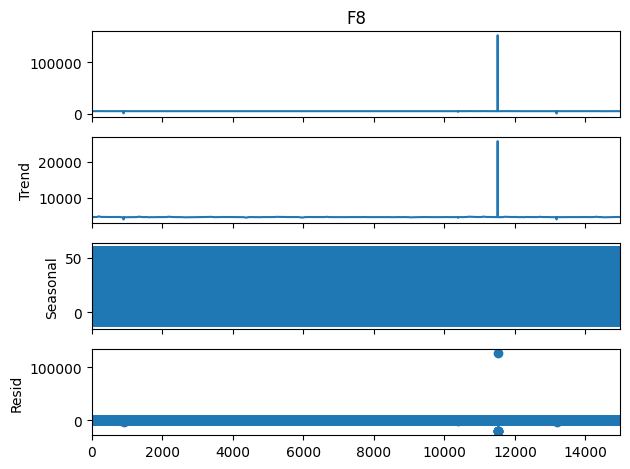

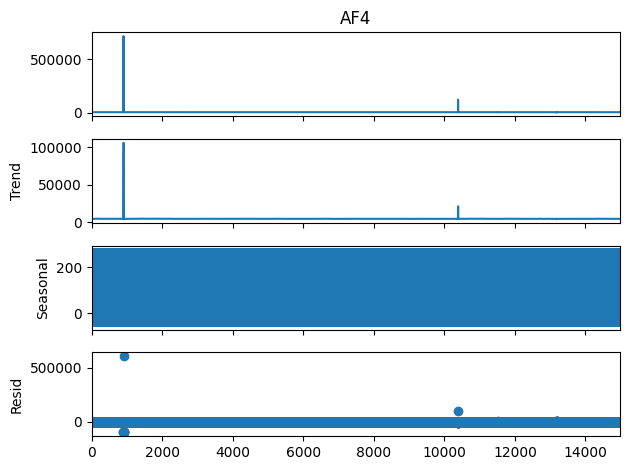

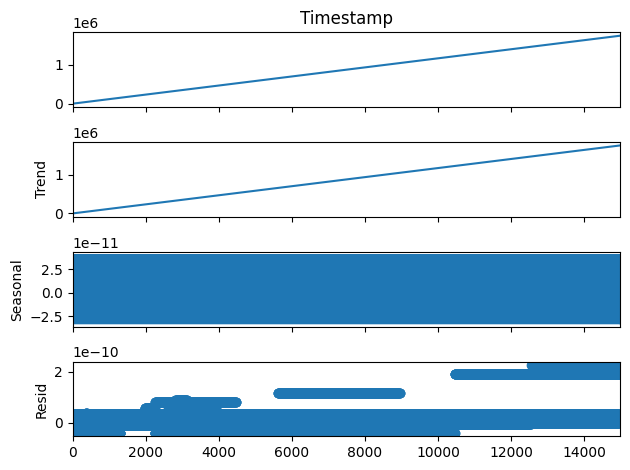

In [ ]:
for feature in X.columns:
  plot_seasonal_components(X[feature],'feature')

## moving averaged data

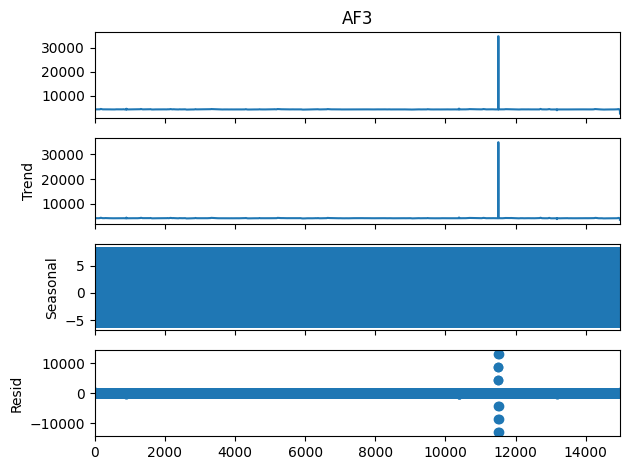

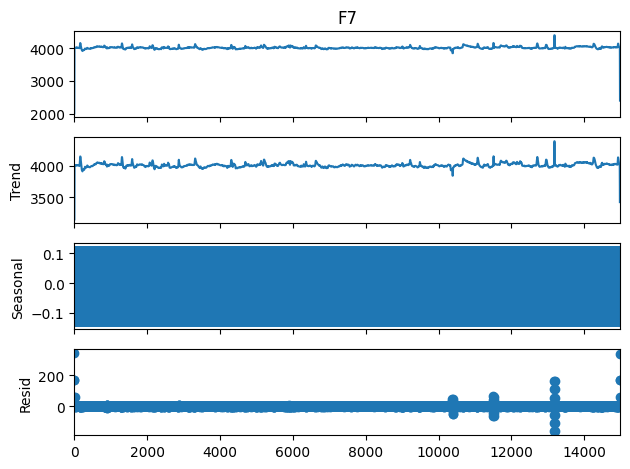

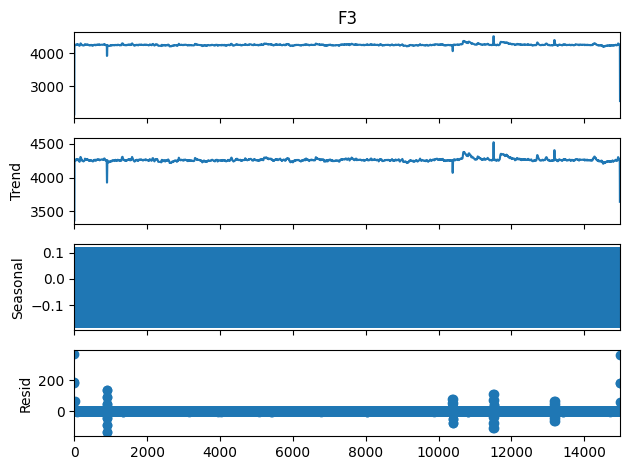

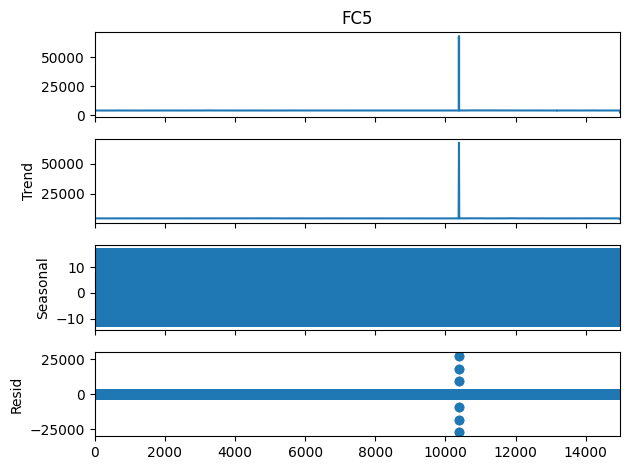

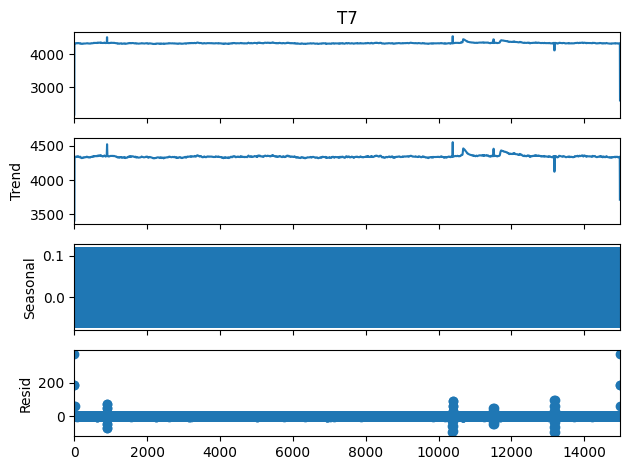

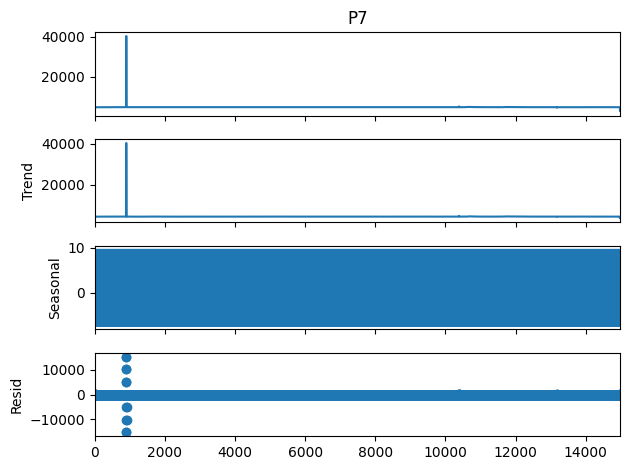

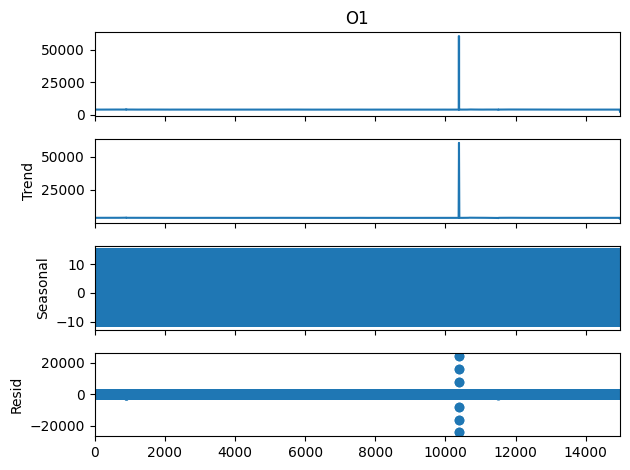

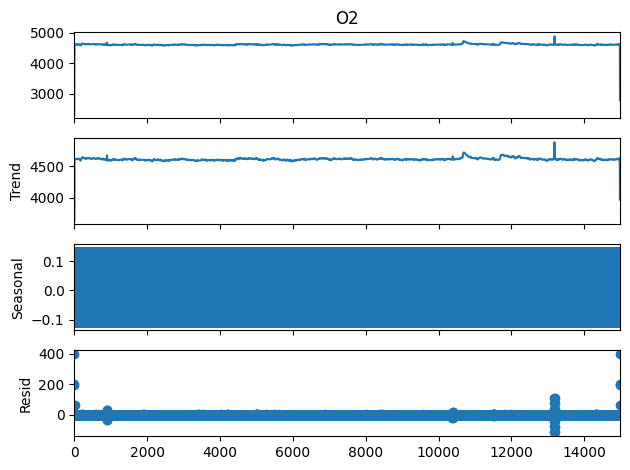

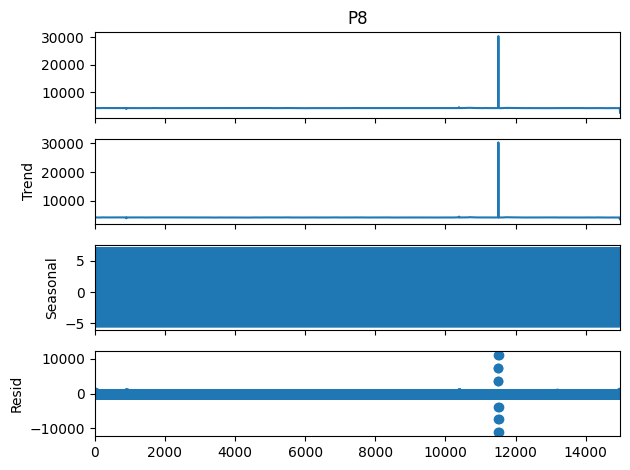

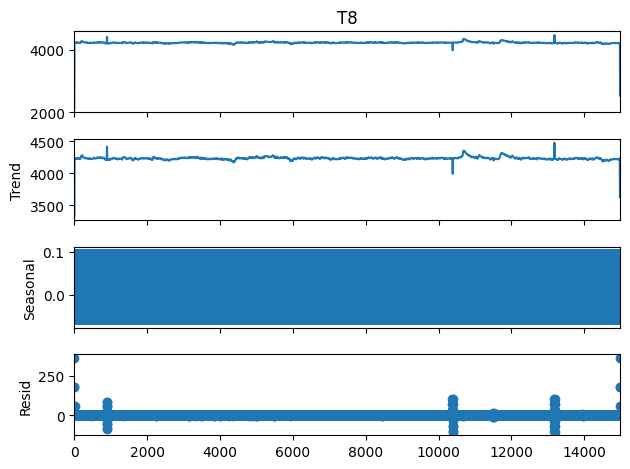

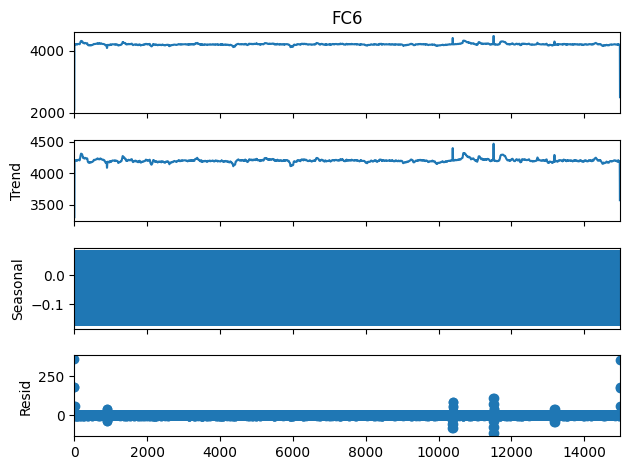

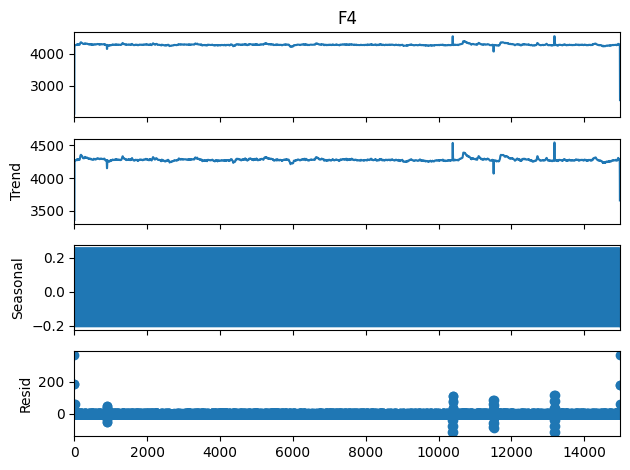

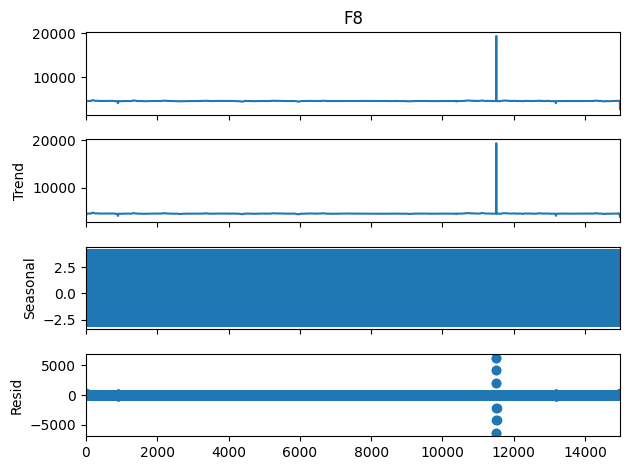

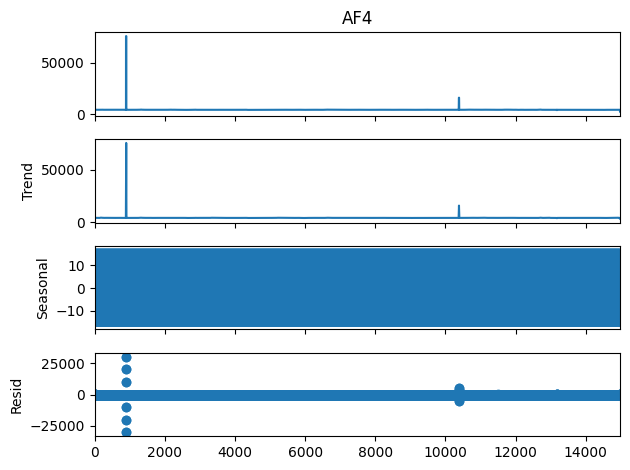

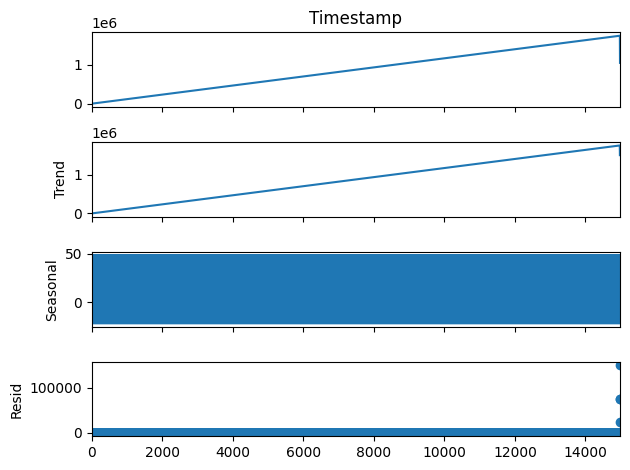

In [ ]:
for feature in X.columns:
  plot_seasonal_components(movingaverage(X[feature],10),feature, False)

# Generating Missing Data and Imputing

In [ ]:
import random
import numpy as np
import copy
#generating 30% missingness for MCAR, MAR and MNAR

#set random seed
random_seed = 42
random.seed(random_seed)
np.random.seed(random_seed)

features_v1 = copy.deepcopy(X)
print(f'Original data NaNs: {np.isnan(features_v1).sum().sum()}')

Original data NaNs: 0


In [ ]:
# --- MCAR (Missing Completely at Random) ---
def generate_mcar_mask(data, missing_rate):
    """Generates a mask for MCAR missing data."""
    mask = np.random.rand(*data.shape) < missing_rate
    return mask

# --- MAR (Missing at Random) ---
def generate_mar_mask(data, missing_rate, dependent_feature_index):
    """Generates a mask for MAR missing data with a target missing rate."""
    mask = np.zeros_like(data, dtype=bool)

    # Identify rows meeting the condition
    condition_met = data[:, dependent_feature_index] > np.mean(data[:, dependent_feature_index])

    # Calculate required missing values for these rows
    num_missing_needed = int(missing_rate * data.shape[0])
    num_eligible_rows = np.sum(condition_met)

    # Adjust missing rate for eligible rows to reach target
    adjusted_missing_rate = min(1.0, num_missing_needed / num_eligible_rows)

    # Introduce missing values for eligible rows
    for i in range(data.shape[0]):
        if condition_met[i]:
            mask[i, :] = np.random.rand(data.shape[1]) < adjusted_missing_rate
    return mask

# --- MNAR (Missing Not at Random) ---
def generate_mnar_mask(data, missing_rate, feature_index):
    """Generates a mask for MNAR missing data with a target missing rate."""
    mask = np.zeros_like(data, dtype=bool)

    # Calculate required missing values for these rows
    num_missing_needed = int(missing_rate * data.shape[0])

    # Find indices to introduce missingness randomly with higher probabilities above the percentile
    # but still allowing some to below it.
    sorted_indices = np.argsort(data[:, feature_index])
    num_to_mask = num_missing_needed

    # Create probabilities with zeros and ones, then normalize to sum to 1
    probs = np.concatenate([np.zeros(int(len(sorted_indices)*(1-missing_rate))),np.ones(int(len(sorted_indices)*missing_rate))])
    probs /= probs.sum() # Normalize probabilities to sum to 1

    mask_indices = np.random.choice(sorted_indices, size=num_to_mask,
                                   replace=False,
                                   # Probability weighted for above percentile
                                   p=probs)

    # Assign missingness based on chosen indices
    mask[mask_indices, :] = True


    return mask



mcar_mask = generate_mcar_mask(features_v1, 0.3)
mar_mask = generate_mar_mask(features_v1.to_numpy(), 0.3, dependent_feature_index=2)
mnar_mask = generate_mnar_mask(features_v1.to_numpy(), 0.3, feature_index=2)

In [ ]:
# Apply masks to create data with missing values
data_mcar = np.ma.masked_array(features_v1, mask=mcar_mask)
data_mar = np.ma.masked_array(features_v1.to_numpy(), mask=mar_mask)
data_mnar = np.ma.masked_array(features_v1.to_numpy(), mask=mnar_mask)

In [ ]:
# print(X2)
print(data_mcar)
print(data_mar)
print(data_mnar)

[[4329.23 4009.23 4289.23 ... 4280.51 4635.9 --]
 [-- -- 4293.85 ... 4279.49 -- 4384.1]
 [4327.69 -- 4295.38 ... 4282.05 -- 4389.23]
 ...
 [4277.44 3990.77 -- ... 4257.95 4591.79 4339.49]
 [4284.62 3991.79 4251.28 ... 4267.18 -- 4350.77]
 [4287.69 3997.44 4260.0 ... 4274.36 4597.95 --]]
[[-- 4009.23 -- ... -- -- --]
 [-- -- -- ... -- -- 4384.1]
 [-- -- -- ... 4282.05 -- --]
 ...
 [4277.44 3990.77 4246.67 ... 4257.95 4591.79 4339.49]
 [4284.62 3991.79 4251.28 ... 4267.18 4596.41 4350.77]
 [4287.69 3997.44 4260.0 ... 4274.36 4597.95 4350.77]]
[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [4277.44 3990.77 4246.67 ... 4257.95 4591.79 4339.49]
 [4284.62 3991.79 4251.28 ... 4267.18 4596.41 4350.77]
 [4287.69 3997.44 4260.0 ... 4274.36 4597.95 4350.77]]


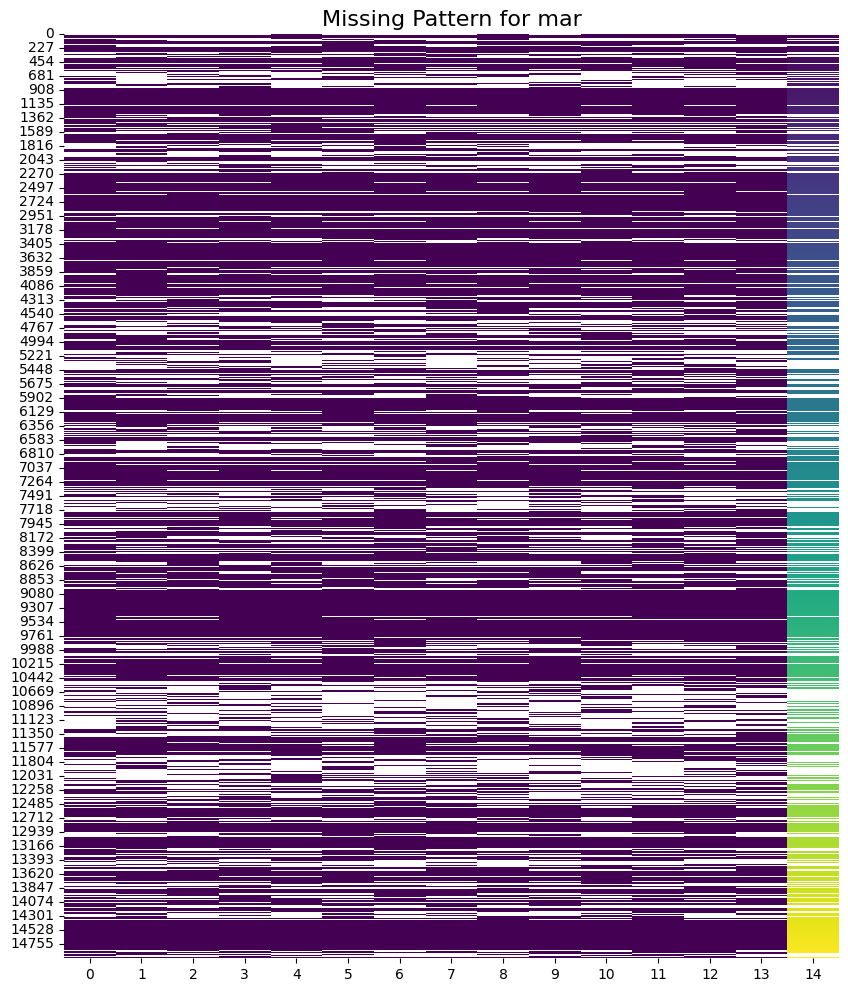

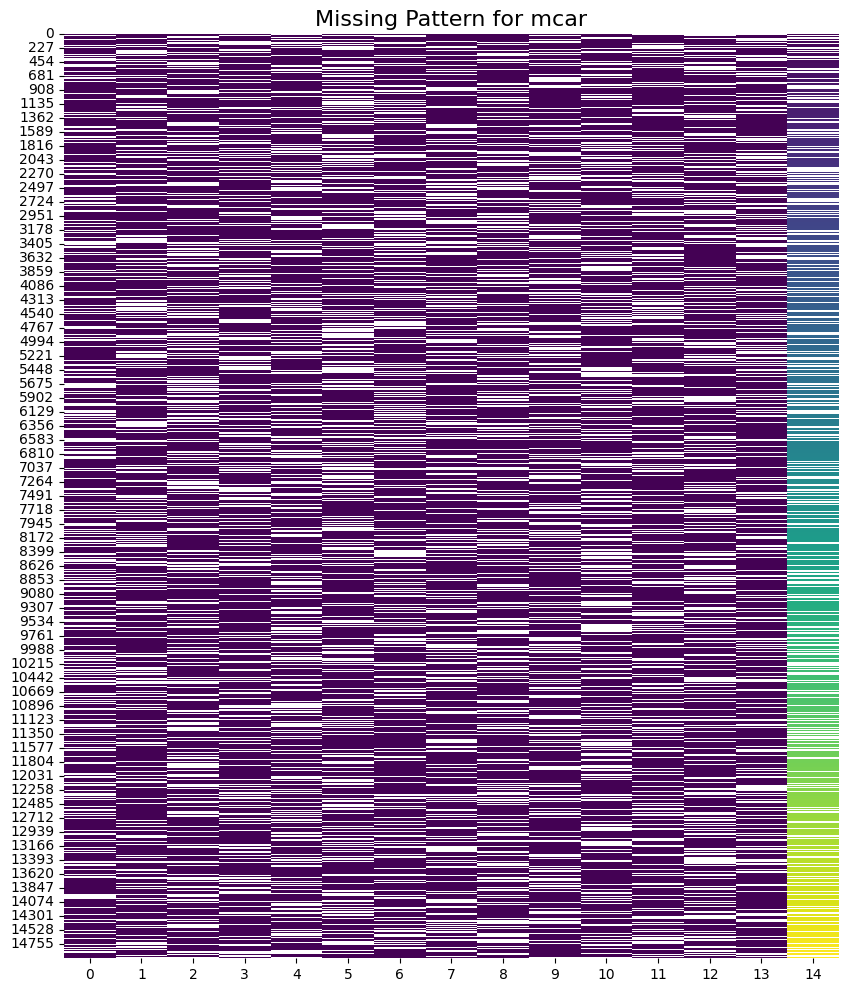

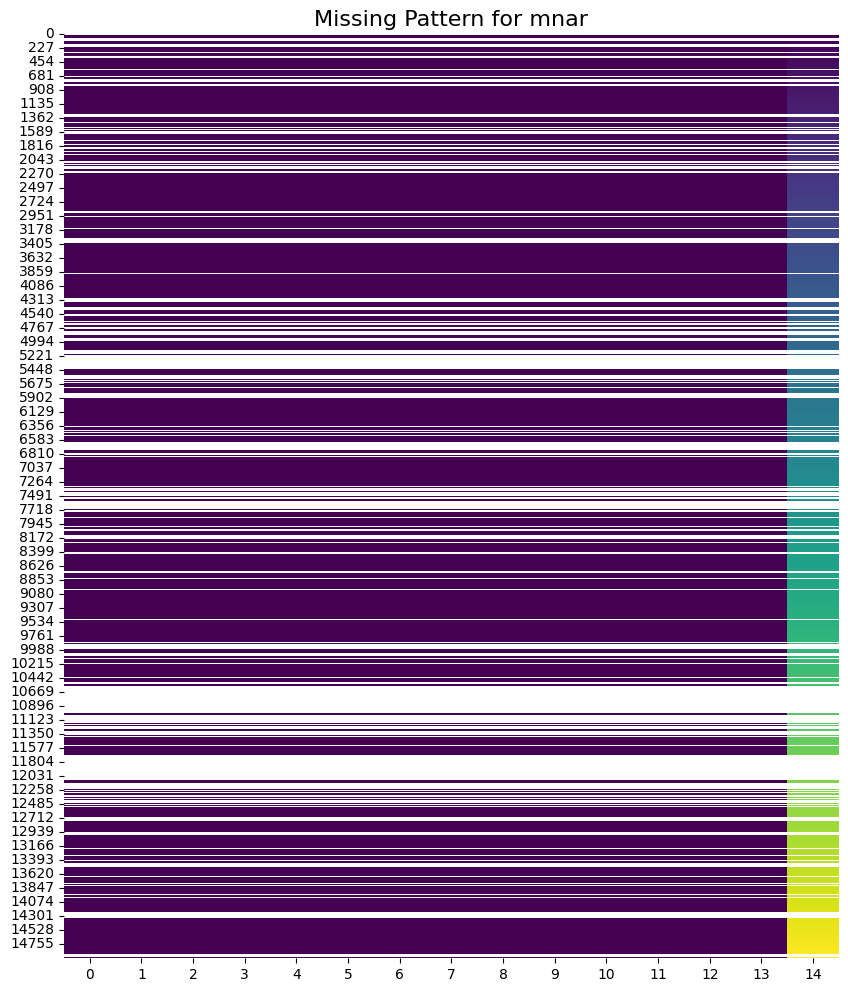

In [ ]:
#compare those three datas
#visualize the missing pattern for each data
import seaborn as sns
import matplotlib.pyplot as plt
import os

# if not os.path.exists(os.path.join(root,'missing_pattern_images_2')):
#     os.makedirs(os.path.join(root,'missing_pattern_images_2'))

# # Define a dictionary to map missing types to data dictionaries
missing_types = {
    'mar': data_mar,
    'mcar': data_mcar,
    'mnar': data_mnar
}
for missing_type, data in missing_types.items():

    num_cols = 14
    fig,ax = plt.subplots(figsize=(10, 12))

    # data_to_plot = data.filled(np.nan)
    # print(data)
    sns.heatmap(data,cbar=False, cmap='viridis', ax=ax)

    plt.title(f'Missing Pattern for {missing_type}', fontsize=16)
    # plt.xticks(rotation=90)  # Rotate labels by 90 degrees
    # Set x-axis ticks to numbers
    # plt.xticks(ticks=range(num_cols), labels=range(num_cols), rotation=90)
    # plt.subplots_adjust(bottom=0.3)  # Adjust 0.2 as needed

    #save the figure with a unique filename
    # filename = f'file{i+1}.png'
    # filepath = os.path.join(miss_rate_dir, filename)
    # plt.savefig(filepath)

    plt.show()
    plt.close()



In [ ]:
#count feature1's datapoint
# print(np.count_nonzero(feature1))

In [ ]:
#checking missing value
# print(mcar_mask)
print(np.isnan(data_mcar).sum())
print(np.isnan(data_mar).sum())
print(np.isnan(data_mnar).sum())

0
0
0


In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd
# # ... (previous code) ...

# # --- Visualization ---
# plt.figure(figsize=(10, 4))

# plt.subplot(131)
# plt.scatter(data[:, 0], data[:, 1], color='blue', label='Observed')
# plt.scatter(data[mcar_mask[:, 1], 0], data[mcar_mask[:, 1], 1], color='red', label='Missing (MCAR)')  # Updated
# plt.xlabel("Feature 0")
# plt.ylabel("Feature 1")
# plt.legend()

# plt.subplot(132)
# plt.scatter(feature1.to_numpy[:, 0], feature1.to_numpy[:, 1], color='blue', label='Observed')
# plt.scatter([mar_mask[:, 1], 0], [mar_mask[:, 1], 1], color='red', label='Missing (MAR)')  # Updated
# plt.xlabel("Feature 0")
# plt.ylabel("Feature 1")
# plt.legend()

# plt.subplot(133)
# plt.scatter(data[:, 0], data[:, 1], color='blue', label='Observed')
# plt.scatter(data[mnar_mask[:, 1], 0], data[mnar_mask[:, 1], 1], color='red', label='Missing (MNAR)')  # Updated
# plt.xlabel("Feature 0")
# plt.ylabel("Feature 1")
# plt.legend()

# plt.tight_layout()
# plt.show()

In [ ]:
#checking if imputed data and original are different
def compare_two_data(orig,synth):
    '''
    metrics: mean, variance
    return mean,variance
    '''
    orig_mean = np.mean(orig)
    synth_mean = np.mean(synth)
    orig_var = np.var(orig)
    synth_var = np.var(synth)

    orig_obj={
        'mean':orig_mean,
        'variance':orig_var
    }
    synth_obj={
        'mean':synth_mean,
        'variance':synth_var
    }
    return orig_obj,synth_obj

# KNN imputation


In [ ]:
# !pip install impyute --upgrade
# import impyute as impy

In [ ]:
from sklearn.impute import KNNImputer
def knn_imputer(data, mask, k=3):
    #convert mask to nan for KNNimputer to recognize

    # dd= data.copy()
    # print(dd[:10])
    data_with_nan = np.where(mask, np.nan, data)
    knn_imputer = KNNImputer(n_neighbors=k)
    knn_data = knn_imputer.fit_transform(data_with_nan)
    return knn_data

knn_data_mcar = knn_imputer(data_mcar, mcar_mask)
knn_data_mar = knn_imputer(data_mar, mar_mask)
knn_data_mnar = knn_imputer(data_mnar, mcar_mask)

In [ ]:
# print(knn_data_mcar)

In [ ]:
print('KNN imputed data info')
orig, knn_obj_mcar_synth = compare_two_data(features_v1.to_numpy(),knn_data_mcar)

for k,v in orig.items():
  print(f'original {k}: {v}')
for k,v in knn_obj_mcar_synth.items():
  print(f'MCAR {k}: {v}')



KNN imputed data info
original mean: 4316.882028546156
original variance: 7455002.257103618
MCAR mean: 4309.405339881749
MCAR variance: 3360157.531720123


# interpolation imputation


In [ ]:
import pandas as pd
def interpolate_imputer(data, method='linear'):
    """
    Fills missing values in a NumPy array using pandas interpolate.

    Args:
        data: The NumPy array with missing values (represented as np.nan).
        method: The interpolation method ('linear', 'nearest', 'cubic', etc.).
                See pandas.DataFrame.interpolate for options.

    Returns:
        The imputed array with missing values filled.
    """
    # Create a pandas DataFrame
    df = pd.DataFrame(data)
    # print(df)

    # Impute missing values using pandas interpolate
    df_interpolated = df.interpolate(method=method, axis=0, limit_direction='both') #axis=0 to impute column-wise

    # Return the imputed data as a NumPy array
    return df_interpolated.to_numpy()

interpolated_data_mcar = interpolate_imputer(data_mcar)
interpolated_data_mar = interpolate_imputer(data_mar)
interpolated_data_mnar = interpolate_imputer(data_mnar)

# Last Observation Carried Forward

In [ ]:
def locf_imputer(data,mask):
    """
    Fills missing values in a masked NumPy array using Last Observation Carried Forward (LOCF).

    Args:
        data: The masked NumPy array with missing values (represented by the mask).

    Returns:
        The imputed array with missing values filled using LOCF.
    """
    dd = pd.DataFrame(data)
    # print(dd.iloc[:10])

    # Fill trailing NaNs with the last valid observation
    df = dd.fillna(method='ffill').fillna(method='bfill')
    # print(df.iloc[:10])
    return df.to_numpy()

locf_data_mcar = locf_imputer(data_mcar,mcar_mask)
locf_data_mar = locf_imputer(data_mar, mar_mask)
locf_data_mnar = locf_imputer(data_mnar,mnar_mask)

<ipython-input-12-87997e44601f>:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = dd.fillna(method='ffill').fillna(method='bfill')


In [ ]:
print(np.isnan(locf_data_mcar).sum().sum())

0


In [ ]:
print(f'LOCF imputed data info')
orig, locf_obj_mcar_synth = compare_two_data(features_v1.to_numpy(),locf_data_mcar)
for k,v in orig.items():
    print(f'Orig {k}: {v}')
for k,v in locf_obj_mcar_synth.items():
    print(f'MCAR {k}: {v}')

LOCF imputed data info
Orig mean: 4316.882028546156
Orig variance: 7455002.257103618
MCAR mean: 4309.679111577341
MCAR variance: 3360558.538684043


# GAN imputation

In [ ]:
import torch, torch.nn as nn
import torch.optim as optim
torch.manual_seed(random_seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(random_seed)

In [ ]:
import torch
import torch.nn as nn
import numpy as np

class GAIN(nn.Module):
    def __init__(self, dim, hint_rate=0.9):
        super().__init__()
        self.dim = dim
        self.generator = nn.Sequential(
            nn.Linear(dim * 2, 128),
            nn.ReLU(),
            nn.Linear(128, dim),
            nn.Sigmoid()
        )
        self.discriminator = nn.Sequential(
            nn.Linear(dim * 2, 128),
            nn.ReLU(),
            nn.Linear(128, dim),
            nn.Sigmoid()
        )
        self.hint_rate = hint_rate

    def forward(self, data_x, mask):
        z = torch.rand_like(data_x)
        data_hat = mask * data_x + (1 - mask) * z
        hint = torch.rand_like(mask)
        hint = (hint < self.hint_rate).float() * mask
        g_input = torch.cat([data_hat, mask], dim=1)
        d_input = torch.cat([data_hat, hint], dim=1)

        g_sample = self.generator(g_input)
        x_hat = mask * data_x + (1 - mask) * g_sample
        d_prob = self.discriminator(d_input)
        return x_hat, d_prob, g_sample


In [ ]:
# from gain import GAIN
# import torch
# from torch.optim import Adam
from tqdm import tqdm
from torch.optim import Adam
def gain_impute(data_missing, epochs=1000, lr=0.001):
    data_tensor = torch.tensor(data_missing, dtype=torch.float32)
    mask_tensor = (~np.isnan(data_missing)).astype(float)
    mask_tensor = torch.tensor(mask_tensor, dtype=torch.float32)

    model = GAIN(data_tensor.shape[1])
    opt = Adam(model.parameters(), lr=lr)

    for _ in tqdm(range(epochs)):
        model.train()
        x_hat, d_prob, g_sample = model(data_tensor, mask_tensor)
        d_loss = torch.mean(mask_tensor * torch.log(d_prob + 1e-8))
        g_loss = torch.mean((mask_tensor * data_tensor - mask_tensor * g_sample)**2)
        loss = -d_loss + g_loss
        opt.zero_grad()
        loss.backward()
        opt.step()

    model.eval()
    x_hat, _, _ = model(data_tensor, mask_tensor)
    return x_hat.detach().numpy()

# Example usage:
# imputed_gain = gain_impute(data_missing)
# bottleneck_gain = tda_distance(data, imputed_gain)
gan_data_mcar = gain_impute(data_mcar)
gan_data_mar = gain_impute(data_mar)
gan_data_mnar = gain_impute(data_mnar)
# print(f"Bottleneck distance (GAIN Imputation): {bottleneck_gain:.4f}")


100%|██████████| 1000/1000 [00:53<00:00, 18.81it/s]


In [ ]:
# !pip install tensorflow-gpu
# import tensorflow as tf
# print(tf.__version__)
# tf.random.set_seed(random_seed)
# tf.keras.utils.set_random_seed(random_seed)

In [ ]:
# import tensorflow as tf

# # Limit GPU memory growth
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#     try:
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#     except RuntimeError as e:
#         print(e)

In [ ]:
print('GAN imputed data info')
orig, gan_obj_mcar_synth = compare_two_data(features_v1.to_numpy(),gan_data_mcar)
for k,v in orig.items():
  print(f'Orig {k}: {v}')
for k,v in gan_obj_mcar_synth.items():
  print(f'MCAR {k}: {v}')

GAN imputed data info
Orig mean: 4316.882028546156
Orig variance: 7455002.257103618
MCAR mean: 4316.8818359375
MCAR variance: 7455002.0


In [ ]:
#verifying there is no masked data in each imputation method
# knn
print(f' KNN imputation check')
# print(f'Original data NaNs: {np.isnan(feature1.to_numpy()).sum()}')
print(f'MCAR: {np.isnan(knn_data_mcar).sum()}')
print(f'MAR: {np.isnan(knn_data_mar).sum()}')
print(f'MNAR: {np.isnan(knn_data_mnar).sum()}')
#interpolation
print(f'\n Interpolation imputation check')
print(f'MCAR: {np.isnan(interpolated_data_mcar).sum()}')
print(f'MAR: {np.isnan(interpolated_data_mar).sum()}')
print(f'MNAR: {np.isnan(interpolated_data_mnar).sum()}')
# #last observation forward carry
print(f'\n LOCF imputation check')
print(f'MCAR: {np.isnan(locf_data_mcar).sum()}')
print(f'MAR: {np.isnan(locf_data_mar).sum()}')
print(f'MNAR: {np.isnan(locf_data_mnar).sum()}')
# #GAN
print(f'\n GAN imputation check')
print(f'MCAR: {np.isnan(gan_data_mcar).sum()}')
print(f'MAR: {np.isnan(gan_data_mar).sum()}')
print(f'MNAR: {np.isnan(gan_data_mnar).sum()}')

 KNN imputation check
MCAR: 0
MAR: 0
MNAR: 0

 Interpolation imputation check
MCAR: 0
MAR: 0
MNAR: 0

 LOCF imputation check
MCAR: 0
MAR: 0
MNAR: 0

 GAN imputation check
MCAR: 0
MAR: 0
MNAR: 0


In [ ]:
datasets = {
    'original': X.to_numpy(),
    'kNN-MCAR': knn_data_mcar,
    'kNN-MAR': knn_data_mar,
    'kNN-MNAR': knn_data_mnar,
    'interpolation-MCAR': interpolated_data_mcar,
    'interpolation-MAR': interpolated_data_mar,
    'interpolation-MNAR': interpolated_data_mnar,
    'LOCF-MCAR': locf_data_mcar,
    'LOCF-MAR': locf_data_mar,
    'LOCF-MNAR': locf_data_mnar,
    'GAN-MCAR': gan_data_mcar,
    'GAN-MAR': gan_data_mar,
    'GAN-MNAR': gan_data_mnar,
}

In [ ]:
import pickle
# Save
with open('datasets.pkl', 'wb') as f:
    pickle.dump(datasets, f)

In [ ]:
# Load
with open('datasets.pkl', 'rb') as f:
    datasets = pickle.load(f)

# tda test gudhi

In [ ]:
!pip install gower
!pip install gudhi
!pip install ucimlrepo
!pip install tslearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 93.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 28.5 MB/s eta 0:00:00


In [ ]:
import gower
import numpy as np
from sklearn.manifold import MDS
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from tslearn.metrics import cdist_dtw,cdist_soft_dtw
from ucimlrepo import fetch_ucirepo
import gudhi as gd
from gudhi.cover_complex import MapperComplex
from tqdm import tqdm
import random
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
# Mapper algorithm

def mapper(df, res, gain):
  gmatrix = gower.gower_matrix(df, cat_features=None) # calculate the distance matrix, metric = gower distance
  filter = MDS(n_components=2, dissimilarity='precomputed').fit_transform(gmatrix) # apply multidimensional to the distance matrix
  if filter.ndim == 1:
    filter.reshape(-1, 1)
  n_filters = np.shape(filter)[1]
  # params = {"filters": filter,
  #           "filter_bnds": np.array([[np.nan]*n_filters]),
  #           "colors": filter,
  #           "resolutions": np.array([res]*n_filters),
  #           "gains": np.array([gain]*n_filters),
  #           "inp": "distance matrix",
  #           "clustering": DBSCAN(metrix='precomputed', eps=0.4)}
  M = MapperComplex(input_type='distance matrix',
                    #colors=filter,
                    filter_bnds=np.full((n_filters,2),np.nan),#np.array([[np.nan]*n_filters]),
                    resolutions=np.array([res]*n_filters),
                    gains=np.array([gain]*n_filters),
                    clustering=DBSCAN(metric='precomputed', eps=1.0, min_samples=3),
                    )
  _ = M.fit(gmatrix,filters=filter,colors=filter)

  return M, filter

In [ ]:
def mapper_time_series(data_3d, res, gain):
    # Ensure data is 3D: (n_series, time_steps, n_features)
    distance_matrix = cdist_dtw(data_3d, n_jobs=-1)  # Parallel DTW
    #distance_matrix = cdist_soft_dtw(data_3d)

    #print(distance_matrix)

    # Apply MDS to the distance matrix
    #filter = MDS(n_components=2, dissimilarity='precomputed').fit_transform(distance_matrix)
    filter = PCA(n_components=min(2, data_3d.shape[1])).fit_transform(data_3d.reshape(len(data_3d), -1))
    #filter = (filter - np.mean(filter)) / np.std(filter)  # Z-score normalization
    n_filters = np.shape(filter)[1]

    M = MapperComplex(
        input_type='distance matrix',
        filter_bnds=np.full((n_filters, 2), np.nan),
        resolutions=np.array([res]*n_filters),
        gains=np.array([gain]*n_filters),
        clustering=DBSCAN(metric='precomputed', eps=4.0, min_samples=2),
    )
    _ = M.fit(distance_matrix, filters=filter, colors=filter)
    return M, filter

In [ ]:
def mapper_time_series(data_3d, res, gain):
    # Ensure data is 3D: (n_series, time_steps, n_features)
    distance_matrix = cdist_dtw(data_3d, n_jobs=-1)  # Parallel DTW
    #distance_matrix = cdist_soft_dtw(data_3d)

    #print(distance_matrix)

    # Apply MDS to the distance matrix
    #filter = MDS(n_components=2, dissimilarity='precomputed').fit_transform(distance_matrix)
    filter = PCA(n_components=min(2, data_3d.shape[1])).fit_transform(data_3d.reshape(len(data_3d), -1))
    #filter = (filter - np.mean(filter)) / np.std(filter)  # Z-score normalization
    n_filters = np.shape(filter)[1]

    M = MapperComplex(
        input_type='distance matrix',
        filter_bnds=np.full((n_filters, 2), np.nan),
        resolutions=np.array([res]*n_filters),
        gains=np.array([gain]*n_filters),
        clustering=DBSCAN(metric='precomputed', eps=4.0, min_samples=2),
    )
    _ = M.fit(distance_matrix, filters=filter, colors=filter)
    return M, filter

In [ ]:
# from: https://github.com/GUDHI/TDA-tutorial/blob/master/Tuto-GUDHI-cover-complex.ipynb

from scipy.sparse.csgraph    import connected_components

def find(i, parents):
    if parents[i] == i:
        return i
    else:
        return find(parents[i], parents)

def union(i, j, parents, f):
    if f[i] <= f[j]:
        parents[j] = i
    else:
        parents[i] = j

def compute_topological_features(M, threshold=0.):
    """
    Compute the topological features (connected components, up/down branches, loops) of the 1-skeleton of the cover complex. Connected components and loops are computed with scipy functions, and branches are detected with Union-Find and 0-dimensional persistence of the 1-skeleton.
    Parameters:
        threshold (float): any topological feature whose size is less than this parameter (relative to the first color function) will be discarded.
    Returns:
        dgm (list of (dim,(a,b)) tuples): list of feature characteristics. dim is the topological dimension of the feature (0 for CCs and branches, 1 for loops), a,b are the min and max of the first color function along the feature.
        bnds (list of lists): list of feature points. Each element of this list is the list of point IDs forming the corresponding feature.
    """
    st = M.simplex_tree_
    num_nodes = st.num_vertices()
    function, namefunc, invnamefunc = {}, {}, {}
    nodeID = 0
    for (s,_) in st.get_skeleton(0):
        namefunc[s[0]] = nodeID
        invnamefunc[nodeID] = s[0]
        function[s[0]] = M.node_info_[s[0]]["colors"][0]
        nodeID += 1
    dgm, bnd = [], []

    # connected_components
    A = np.zeros([num_nodes, num_nodes])
    for (splx,_) in st.get_skeleton(1):
        if len(splx) == 2:
            A[namefunc[splx[0]], namefunc[splx[1]]] = 1
            A[namefunc[splx[1]], namefunc[splx[0]]] = 1
    _, ccs = connected_components(A, directed=False)
    for ccID in np.unique(ccs):
        pts = np.argwhere(ccs == ccID).flatten()
        vals = [function[invnamefunc[p]] for p in pts]
        if np.abs(min(vals) - max(vals)) >= threshold:
            dgm.append((0, (min(vals), max(vals))))
            bnd.append([invnamefunc[p] for p in pts])

    # loops
    G = M.get_networkx()
    try:
        from networkx import cycle_basis
        bndall = cycle_basis(G)
        for pts in bndall:
            vals = [function[p] for p in pts]
            if np.abs(min(vals) - max(vals)) >= threshold:
                dgm.append((1,(min(vals), max(vals))))
                bnd.append(pts)
    except ImportError:
        print("Networkx not found, loops not computed")

    # branches
    for topo_type in ["downbranch", "upbranch"]:

        lfunction = []
        for i in range(num_nodes):
            lfunction.append(function[invnamefunc[i]])

        # upranch is downbranch of opposite function
        if topo_type == "upbranch":
            lfunction = [-f for f in lfunction]

        # sort vertices according to function values and compute inverse function
        sorted_idxs = np.argsort(np.array(lfunction))
        inv_sorted_idxs = np.zeros(num_nodes)
        for i in range(num_nodes):
            inv_sorted_idxs[sorted_idxs[i]] = i

        # go through all vertices in ascending function order
        persistence_diag, persistence_set, parents, visited = {}, {}, -np.ones(num_nodes, dtype=np.int32), {}
        for i in range(num_nodes):

            current_pt = sorted_idxs[i]
            neighbors = np.ravel(np.argwhere(A[current_pt,:] == 1))
            lower_neighbors = [n for n in neighbors if inv_sorted_idxs[n] <= i] if len(neighbors) > 0 else []

            # no lower neighbors: current point is a local minimum
            if lower_neighbors == []:
                parents[current_pt] = current_pt

            # some lower neighbors exist
            else:

                # find parent pg of lower neighbors with lowest function value
                neigh_parents = [find(n, parents) for n in lower_neighbors]
                pg = neigh_parents[np.argmin([lfunction[n] for n in neigh_parents])]

                # set parent of current point to pg
                parents[current_pt] = pg

                # for each lower neighbor, we will create a persistence diagram point and corresponding set of nodes
                for neighbor in lower_neighbors:

                    # get parent pn
                    pn = find(neighbor, parents)
                    val = lfunction[pn]
                    persistence_set[pn] = []

                    # we will create persistence set only if parent pn is not local minimum pg
                    if pn != pg:
                        # go through all strictly lower nodes with parent pn
                        for v in sorted_idxs[:i]:
                            if find(v, parents) == pn:
                                # if it is already part of another persistence set, continue
                                try:
                                    visited[v]
                                # else, mark visited and include it in current persistence set
                                except KeyError:
                                    visited[v] = True
                                    persistence_set[pn].append(v)

                        # add current point to persistence set
                        persistence_set[pn].append(current_pt)

                        # do union and create persistence point corresponding to persistence set if persistence is sufficiently large
                        if np.abs(lfunction[pn]-lfunction[current_pt]) >= threshold:
                            persistence_diag[pn] = current_pt
                            union(pg, pn, parents, lfunction)

        for key, val in iter(persistence_diag.items()):
            if topo_type == "downbranch":
                dgm.append((0, (lfunction[key],  lfunction[val])))
            elif topo_type == "upbranch":
                dgm.append((0, (-lfunction[val], -lfunction[key])))
            bnd.append([invnamefunc[v] for v in persistence_set[key]])

    bnd = [list(b) for b in bnd]
    M.persistence_diagram, M.persistence_sets = dgm, bnd
    return dgm, bnd

In [ ]:
def bottleneck_dist(C1, C2):
    M1, fil1 = C1
    M2, fil2 = C2

    dgm1, _ = compute_topological_features(M1, threshold=0.0)
    dgm2, _ = compute_topological_features(M2, threshold=0.0)

    # Filter out noise (birth ≈ death)
    D1 = np.array([[b, d] for (dim, (b, d)) in dgm1 if abs(b - d) > 1e-6], dtype=np.float64)
    D2 = np.array([[b, d] for (dim, (b, d)) in dgm2 if abs(b - d) > 1e-6], dtype=np.float64)

    if len(D1) == 0 and len(D2) == 0:
        print("Both empty")
        return 0.0  # Both empty means identical
    elif len(D1) == 0:
        print("D1 empty")
        return max(d - b for (b, d) in D2) if len(D2) > 0 else 0.0
    elif len(D2) == 0:
        print("D2 empty")
        return max(d - b for (b, d) in D1) if len(D1) > 0 else 0.0
    else:
        print("Both not empty")
        return gd.bottleneck_distance(D1, D2)

In [ ]:
def visualize_mapper(M, filter_values, res, gain,
                     node_size=50, cmap=plt.cm.viridis,
                     title="Mapper Complex", figsize=(10, 8)):
    """
    Visualize the Mapper graph with nodes colored by filter values.
    """
    plt.figure(figsize=figsize)
    ax = plt.gca()

    # Extract the Mapper graph
    G = M.get_networkx()

    # Handle empty graphs
    if len(G.nodes()) == 0:
        plt.title("No nodes in Mapper graph!")
        plt.axis("off")
        plt.show()
        return

    # Get node positions from filter_values (using cluster centroids)
    pos = {}
    for node in G.nodes():
        # Get indices of data points in this node
        node_indices = M.node_info_[node]["indices"]
        # Compute centroid of the filter values for these points
        centroid = np.mean(filter_values[node_indices], axis=0)
        pos[node] = (centroid[0], centroid[1])  # Use first two components

    # Get node colors based on filter values (first component)
    node_colors = [np.mean(filter_values[M.node_info_[node]["indices"]][:, 0])
                   for node in G.nodes()]

    # Handle identical colors (single node)
    vmin, vmax = min(node_colors), max(node_colors)
    if vmin == vmax:
        vmin -= 1e-6
        vmax += 1e-6

    # Draw the graph
    nx.draw_networkx_nodes(
        G, pos,
        node_size=node_size,
        node_color=node_colors,
        cmap=cmap,
        alpha=0.8,
        ax=ax
    )
    nx.draw_networkx_edges(
        G, pos,
        alpha=0.2,
        edge_color='gray',
        ax=ax
    )

    # Add colorbar
    sm = plt.cm.ScalarMappable(
        cmap=cmap,
        norm=plt.Normalize(vmin=vmin, vmax=vmax)
    )
    sm.set_array([])
    plt.colorbar(sm, ax=ax, label="Filter Value (First Component)")

    # Add title and annotations
    plt.title(f"{title}\nResolution={res}, Gain={gain}")
    plt.axis("off")
    plt.show()

In [ ]:
def plot_persistence_diagram(dgm, title="Persistence Diagram"):
    """
    Plot a persistence diagram with features colored by dimension.
    """
    plt.figure(figsize=(8, 8))

    # Separate features by dimension
    dims = {}
    for pt in dgm:
        dim, (birth, death) = pt
        if dim not in dims:
            dims[dim] = []
        dims[dim].append((birth, death))

    # Plot each dimension with different markers/colors
    markers = {0: 'o', 1: 's', 2: '^'}  # 0D, 1D, 2D
    colors = {0: 'blue', 1: 'red', 2: 'green'}

    for dim in dims:
        births, deaths = zip(*dims[dim])
        plt.scatter(births, deaths,
                    c=colors.get(dim, 'gray'),
                    marker=markers.get(dim, 'x'),
                    label=f'Dim {dim}')

    # Add diagonal and labels
    plt.plot([0, 1], [0, 1], 'k--', label='Diagonal')
    plt.xlabel('Birth')
    plt.ylabel('Death')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
for res in res_list:
    for gain in gain_list:
        samp1, samp2 = [], []
        for i in tqdm(range(num_samples)):
            # Bootstrap time series IDs
            # r1 = np.random.choice(num_series, num_series, replace=True)  # Sample with replacement
            # r2 = np.random.choice(num_series, num_series, replace=True)

            r1 = random.randint(0,128)
            r2 = random.randint(0,128)

            # Compute Mapper complexes
            M1, fil1 = mapper_time_series(TS1[r1,:,:], res, gain)
            M2, fil2 = mapper_time_series(TS2[r2,:,:], res, gain)
            samp1.append((M1,fil1))
            samp2.append((M2,fil2))

            G = M1.get_networkx()
            print(G)

        # Shuffle and compute bottleneck distances
        # samp = samp1 + samp2
        # random.shuffle(samp)
        # samp_1 = samp[:num_samples]
        # samp_2 = samp[num_samples:]

        max_Bs = []
        for t in range(num_samples):
            max_Bs.append(bottleneck_dist(samp1[t], samp2[t]))
            #max_Bs.append(bottleneck_dist(samp_1[t], samp_2[t]))

        output_dict[(res, gain)] = max_Bs
        print(f"res={res}, gain={gain}: {max_Bs}")

# tda test giotto

In [ ]:
!pip freeze > requirements.txt

In [ ]:
!pip uninstall numpy
!python -m pip install -U giotto-tda

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/numpy-config
    /usr/local/lib/python3.11/dist-packages/numpy-2.0.2.dist-info/*
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libgfortran-040039e1-0352e75f.so.5.0.0
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libquadmath-96973f99-934c22de.so.0.0.0
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libscipy_openblas64_-99b71e71.so
    /usr/local/lib/python3.11/dist-packages/numpy/*
Proceed (Y/n)? Y
  Successfully uninstalled numpy-2.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 91.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.8/558.8 kB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━

In [ ]:
!pip install -r requirements.txt

  Using cached scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.9 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.19.0 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.19.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2

In [ ]:
from gtda.plotting import plot_point_cloud
from gtda.time_series import SingleTakensEmbedding
from gtda.plotting import plot_point_cloud
from gtda.homology import VietorisRipsPersistence
from sklearn.decomposition import PCA
from statsmodels.stats.multitest import multipletests
import plotly.graph_objects as go
import numpy as np
import pickle
import random
from tqdm import tqdm

ModuleNotFoundError: No module named 'numpy.char'

In [ ]:
# Load
with open('datasets.pkl', 'rb') as f:
    datasets = pickle.load(f)

In [ ]:
def fit_embedder(embedder: SingleTakensEmbedding, y: np.ndarray, verbose: bool=True) -> np.ndarray:
    """Fits a Takens embedder and displays optimal search parameters."""
    y_embedded = embedder.fit_transform(y)

    if verbose:
        print(f"Shape of embedded time series: {y_embedded.shape}")
        print(
            f"Optimal embedding dimension is {embedder.dimension_} and time delay is {embedder.time_delay_}"
        )

    return y_embedded

In [ ]:
def get_persistence_search(ts_vals, verbose=False):
  x_nonperiodic = np.linspace(0, len(ts_vals), len(ts_vals))
  y_nonperiodic = ts_vals

  max_embedding_dimension = 30
  max_time_delay = 30
  stride = 5

  embedder_periodic = SingleTakensEmbedding(
      parameters_type="search",
      time_delay=max_time_delay,
      dimension=max_embedding_dimension,
      stride=stride,
  )

  pca = PCA(n_components=3)
  y_nonperiodic_embedded = fit_embedder(embedder_periodic, y_nonperiodic, verbose=verbose)
  y_nonperiodic_embedded = pca.fit_transform(y_nonperiodic_embedded)

  if verbose:
    fig = go.Figure(data=go.Scatter(x=x_nonperiodic, y=y_nonperiodic))
    fig.update_layout(xaxis_title="Timestamp", yaxis_title="Amplitude")
    fig.show()
    plot_point_cloud(y_nonperiodic_embedded)

  y_nonperiodic_embedded = y_nonperiodic_embedded[None, :, :]
  # 0 - connected components, 1 - loops, 2 - voids
  homology_dimensions = [0, 1, 2]

  nonperiodic_persistence = VietorisRipsPersistence(
      homology_dimensions=homology_dimensions, n_jobs=6
  )
  if verbose:
    print("Persistence diagram for nonperiodic signal")
    nonperiodic_persistence.fit_transform_plot(y_nonperiodic_embedded);

In [ ]:
def get_persistence(ts_vals, verbose=False):
  x_nonperiodic = np.linspace(0, len(ts_vals), len(ts_vals))
  y_nonperiodic = ts_vals

  embedding_dimension_nonperiodic = 3
  embedding_time_delay_nonperiodic = 16
  stride = 3

  embedder_nonperiodic = SingleTakensEmbedding(
      parameters_type="fixed",
      n_jobs=-1,
      time_delay=embedding_time_delay_nonperiodic,
      dimension=embedding_dimension_nonperiodic,
      stride=stride,
  )


  pca = PCA(n_components=3)
  y_nonperiodic_embedded = embedder_nonperiodic.fit_transform(y_nonperiodic)
  y_nonperiodic_embedded = pca.fit_transform(y_nonperiodic_embedded)

  if verbose:
    fig = go.Figure(data=go.Scatter(x=x_nonperiodic, y=y_nonperiodic))
    fig.update_layout(xaxis_title="Timestamp", yaxis_title="Amplitude")
    fig.show()
    plot_point_cloud(y_nonperiodic_embedded)

  y_nonperiodic_embedded = y_nonperiodic_embedded[None, :, :]
  # 0 - connected components, 1 - loops, 2 - voids
  homology_dimensions = [0, 1, 2]

  nonperiodic_persistence = VietorisRipsPersistence(
      homology_dimensions=homology_dimensions, n_jobs=6
  )
  if verbose:
    print("Persistence diagram for nonperiodic signal")
    nonperiodic_persistence.fit_transform_plot(y_nonperiodic_embedded);
  return nonperiodic_persistence.fit_transform(y_nonperiodic_embedded)

In [ ]:
import gudhi as gd
def bottleneck_dist(dgm1, dgm2):
    # Convert to numpy arrays with dimension handling
    D1 = np.array([[p[0], p[1]] for p in dgm1 if p[2] <= 2], dtype=np.float64)  # Include dimensions up to 2
    D2 = np.array([[p[0], p[1]] for p in dgm2 if p[2] <= 2], dtype=np.float64)

    # Filter out diagonal points (birth == death)
    D1 = D1[np.abs(D1[:, 1] - D1[:, 0]) > 1e-6]
    D2 = D2[np.abs(D2[:, 1] - D2[:, 0]) > 1e-6]

    return gd.bottleneck_distance(D1, D2)

In [ ]:
def monte_carlo_pvalue(observed_mean, null_distribution, num_samples=100000):
    """Compute p-value using Monte Carlo sampling"""
    null_samples = np.random.choice(null_distribution, size=num_samples, replace=True)
    return (np.sum(null_samples >= observed_mean) + 1) / (num_samples + 1)

In [ ]:
def benjamini_hochberg(p_values, alpha=0.05):
    """Adjusts p-values using Benjamini-Hochberg procedure"""
    n = len(p_values)
    ranked_p = multipletests(p_values, alpha=alpha, method='fdr_bh')
    return ranked_p[1]

In [ ]:
num_series = 14980//117
num_samples = 5

X1 = datasets['original'].to_numpy()[:num_series * 117].reshape(num_series, 117,15)
X2 = datasets['kNN-MCAR'][:num_series * 117].reshape(num_series, 117,15)
X3 = datasets['GAN-MCAR'][:num_series * 117].reshape(num_series, 117,15)
X4 = datasets['LOCF-MCAR'][:num_series * 117].reshape(num_series, 117,15)
X5 = datasets['interpolation-MCAR'][:num_series * 117].reshape(num_series, 117,15)

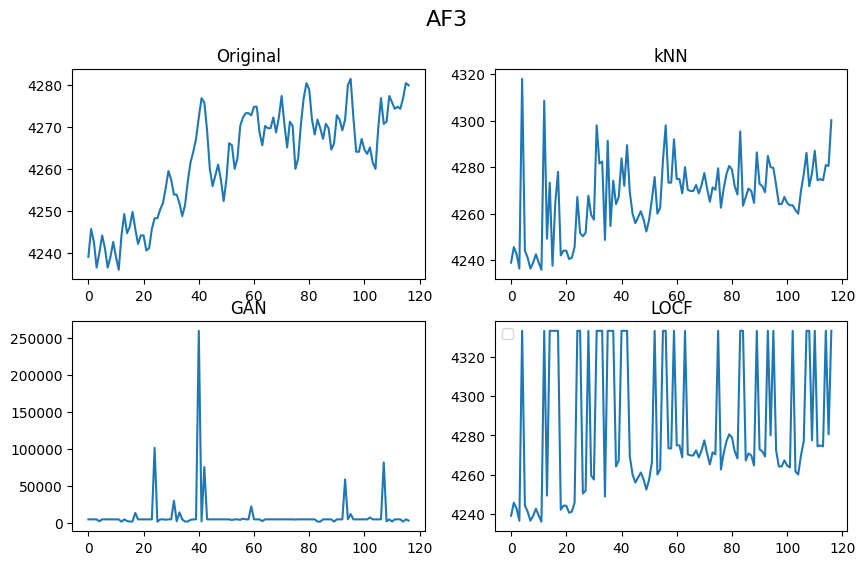

Name AF3
Type Original
Mean 4262.020256410256
Variance 156.718017882971
Max Diff 0.0
Name AF3
Type kNN
Mean 4267.288831908832
Variance 257.2372712851342
Max Diff 77.94666666666672
Name AF3
Type GAN
Mean 9160.973773578562
Variance 743097475.5725144
Max Diff 255238.06128437698
Name AF3
Type LOCF
Mean 4261.838504273504
Variance 155.08564501588805
Max Diff 8.715000000000146


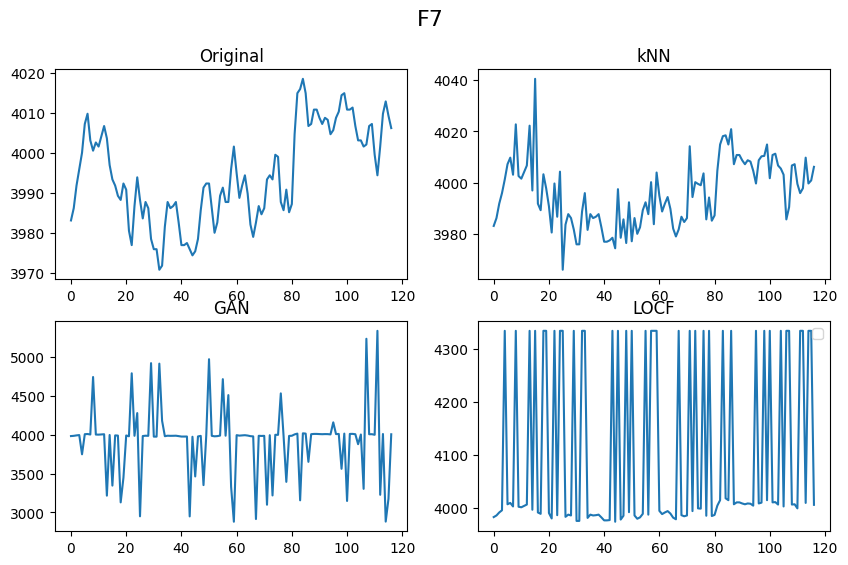

Name F7
Type Original
Mean 3994.6524786324785
Variance 140.05330582219239
Max Diff 0.0
Name F7
Type kNN
Mean 3996.0113675213684
Variance 168.05469252684492
Max Diff 47.18333333333294
Name F7
Type GAN
Mean 3925.649087850721
Variance 189837.71085779008
Max Diff 1343.3196946682688
Name F7
Type LOCF
Mean 3994.8058974358974
Variance 136.7487378223381
Max Diff 8.54666666666617


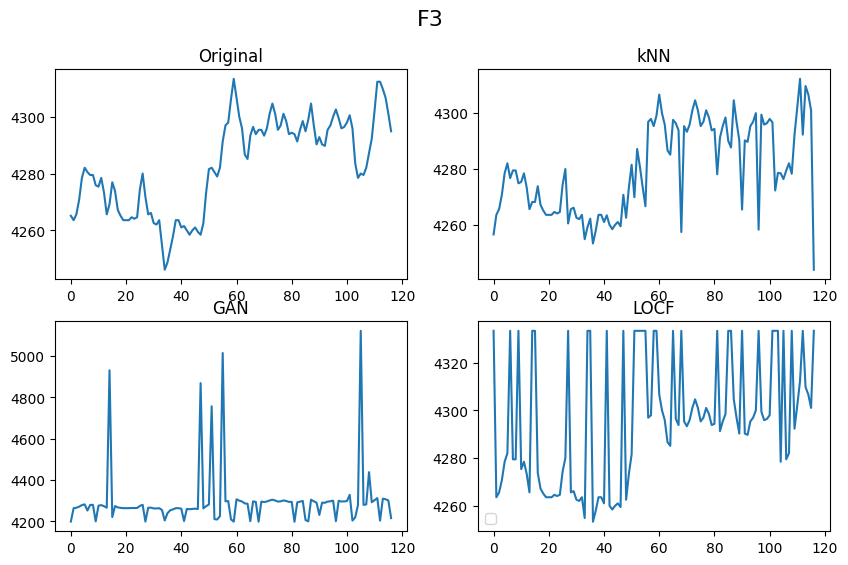

Name F3
Type Original
Mean 4282.875128205128
Variance 269.89398566732353
Max Diff 0.0
Name F3
Type kNN
Mean 4280.241253561253
Variance 258.03316632981716
Max Diff 50.9366666666665
Name F3
Type GAN
Mean 4297.312312804172
Variance 20425.808389662816
Max Diff 842.9776381733964
Name F3
Type LOCF
Mean 4282.958846153847
Variance 254.048966083168
Max Diff 10.259999999999309


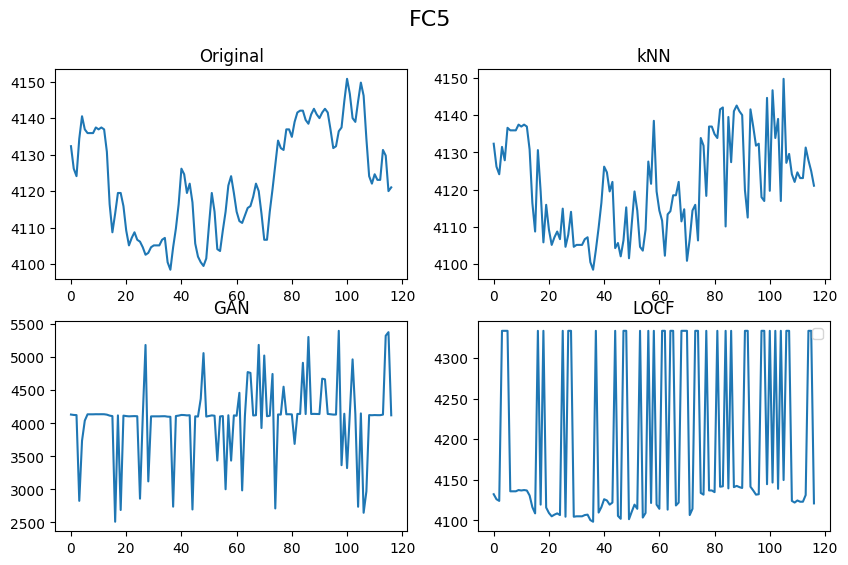

Name FC5
Type Original
Mean 4123.177948717949
Variance 201.56542998027558
Max Diff 0.0
Name FC5
Type kNN
Mean 4121.158860398861
Variance 167.23971133188724
Max Diff 31.96666666666715
Name FC5
Type GAN
Mean 4066.4639632208055
Variance 330112.2419776242
Max Diff 1604.117096546322
Name FC5
Type LOCF
Mean 4123.066538461539
Variance 189.35759136532897
Max Diff 10.510000000000218


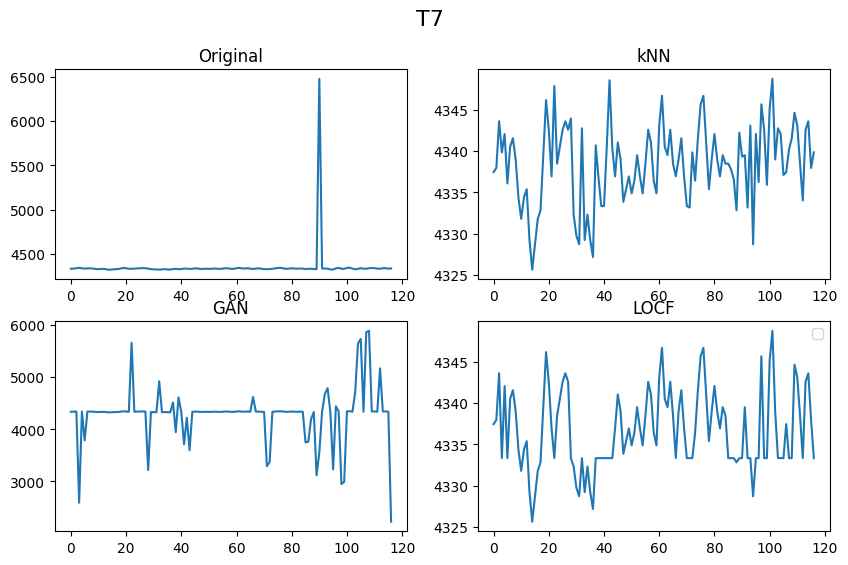

Name T7
Type Original
Mean 4355.782735042735
Variance 38716.44528482722
Max Diff 0.0
Name T7
Type kNN
Mean 4338.423048433049
Variance 22.542101343333766
Max Diff 2135.043333333333
Name T7
Type GAN
Mean 4286.566573158803
Variance 269651.94983171456
Max Diff 2917.604489162036
Name T7
Type LOCF
Mean 4337.735555555556
Variance 23.094882276828347
Max Diff 2137.0933333333332


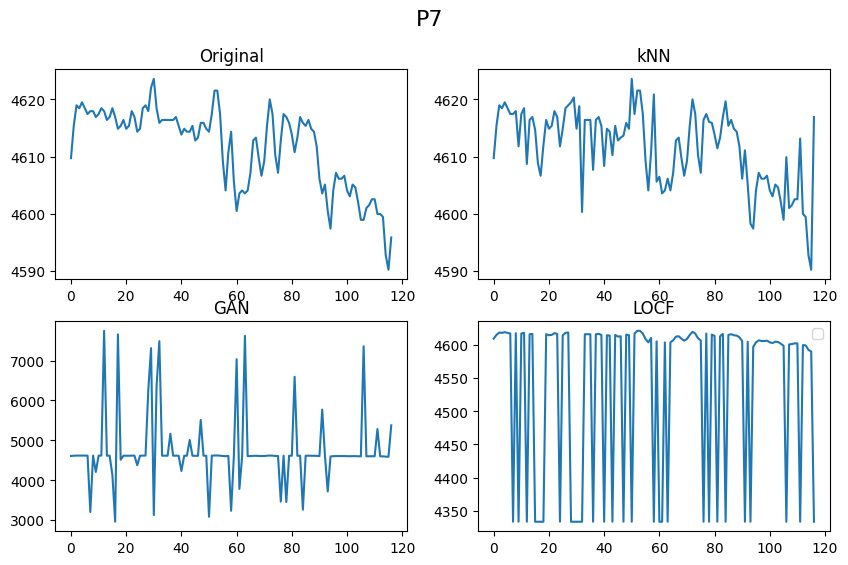

Name P7
Type Original
Mean 4611.658547008547
Variance 48.929350880268025
Max Diff 0.0
Name P7
Type kNN
Mean 4611.627948717948
Variance 44.13367005624902
Max Diff 21.02333333333354
Name P7
Type GAN
Mean 4742.495733844993
Variance 734864.1220773638
Max Diff 3125.4694080545123
Name P7
Type LOCF
Mean 4611.666452991452
Variance 46.543254470011384
Max Diff 6.154999999999745


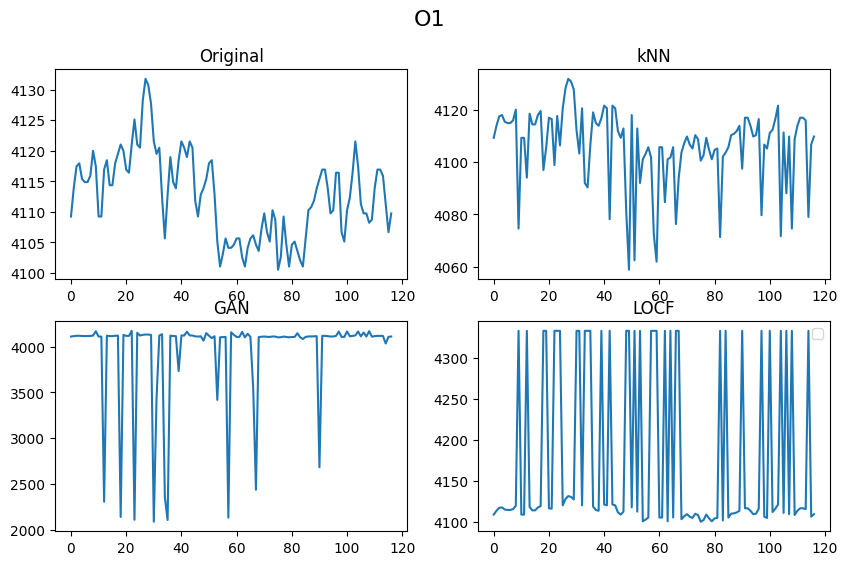

Name O1
Type Original
Mean 4112.623504273504
Variance 46.90123472861375
Max Diff 0.0
Name O1
Type kNN
Mean 4106.018034188033
Variance 214.71028910804242
Max Diff 56.576666666666824
Name O1
Type GAN
Mean 3955.026861169948
Variance 253453.3342273553
Max Diff 2032.7397194102928
Name O1
Type LOCF
Mean 4112.748162393163
Variance 45.23571036963942
Max Diff 14.099999999999454


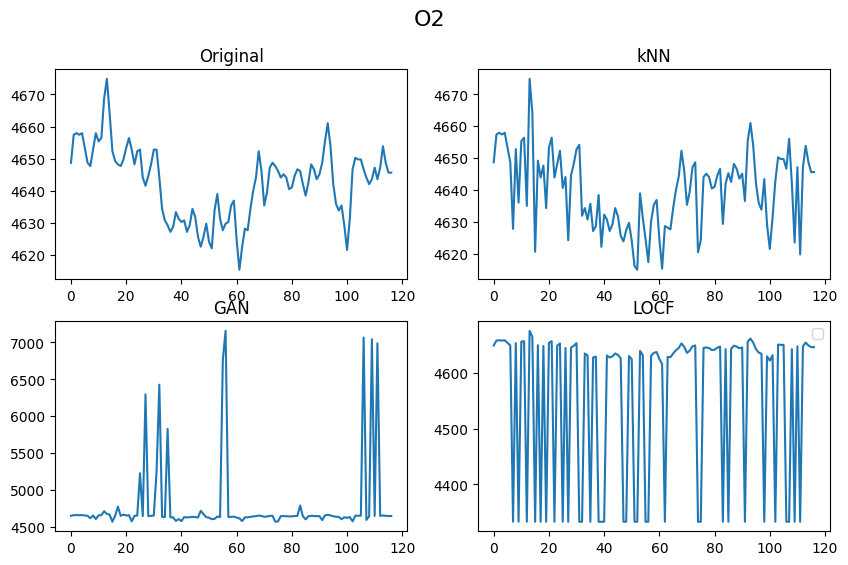

Name O2
Type Original
Mean 4642.520170940171
Variance 121.31059313317215
Max Diff 0.0
Name O2
Type kNN
Mean 4639.951823361823
Variance 141.5351201321404
Max Diff 33.67666666666628
Name O2
Type GAN
Mean 4789.647490724252
Variance 287030.610538161
Max Diff 2527.572218458671
Name O2
Type LOCF
Mean 4642.518034188034
Variance 116.04936979417683
Max Diff 7.006666666667115


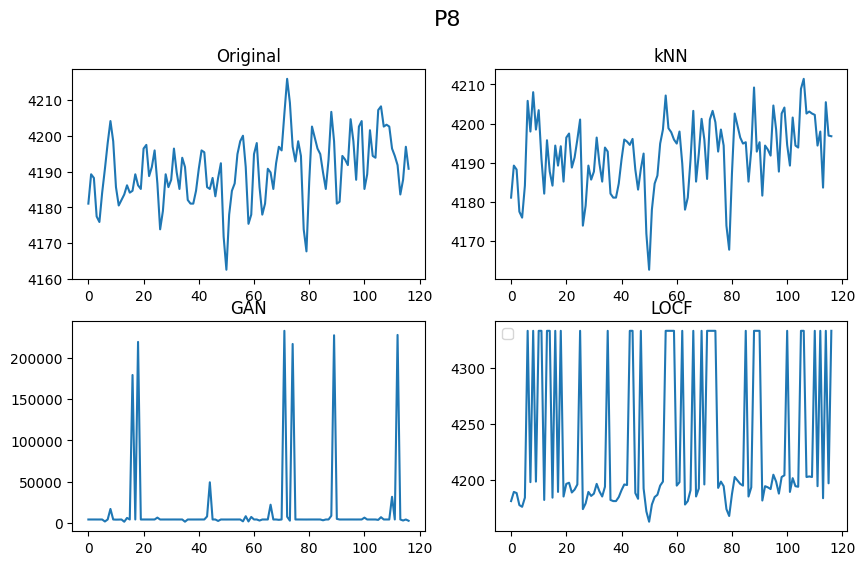

Name P8
Type Original
Mean 4190.458119658119
Variance 82.45185629337412
Max Diff 0.0
Name P8
Type kNN
Mean 4192.341452991453
Variance 81.48295182993688
Max Diff 22.399999999999636
Name P8
Type GAN
Mean 16066.885810603857
Variance 2236479060.2214184
Max Diff 228791.37517729934
Name P8
Type LOCF
Mean 4190.292364672365
Variance 60.22451835181924
Max Diff 21.23199999999997


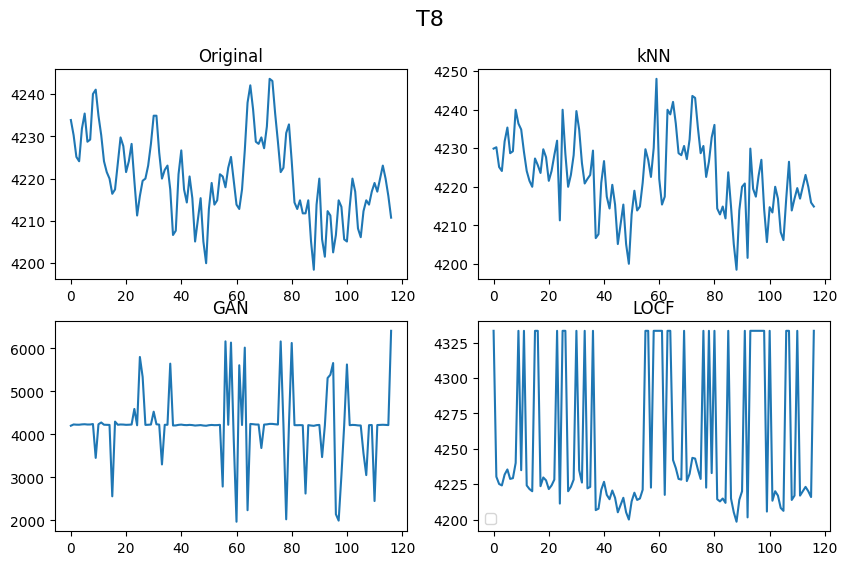

Name T8
Type Original
Mean 4220.245641025642
Variance 95.83443655489815
Max Diff 0.0
Name T8
Type kNN
Mean 4222.764188034188
Variance 98.55461541383596
Max Diff 28.543333333333067
Name T8
Type GAN
Mean 4216.791668699314
Variance 653527.4052881495
Max Diff 2244.047901273053
Name T8
Type LOCF
Mean 4220.018632478633
Variance 97.06826385909434
Max Diff 10.401428571428369


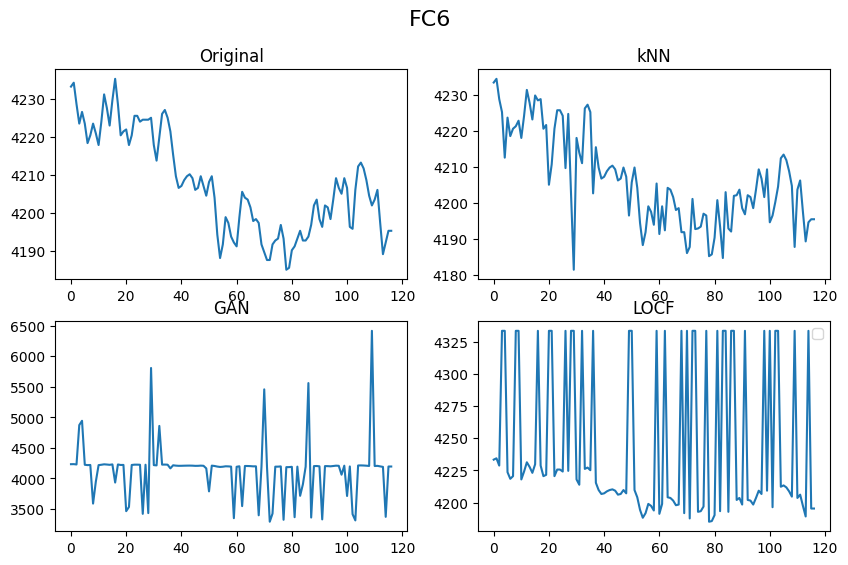

Name FC6
Type Original
Mean 4207.744615384615
Variance 172.57538724523405
Max Diff 0.0
Name FC6
Type kNN
Mean 4206.290797720798
Variance 161.36764646715642
Max Diff 43.76333333333423
Name FC6
Type GAN
Mean 4142.941782539983
Variance 202192.0727111747
Max Diff 2212.7508153907374
Name FC6
Type LOCF
Mean 4207.691752136751
Variance 166.1750057856682
Max Diff 6.150000000000546


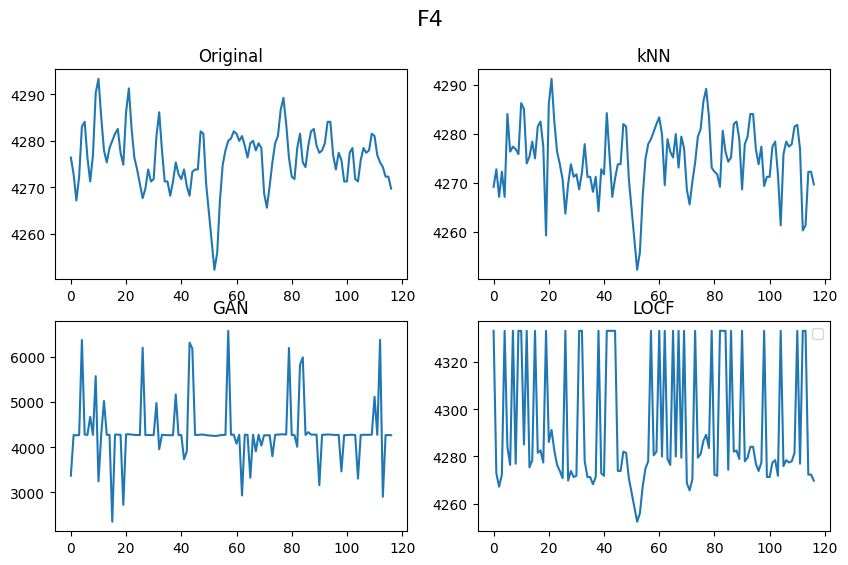

Name F4
Type Original
Mean 4276.322564102564
Variance 41.05974727153165
Max Diff 0.0
Name F4
Type kNN
Mean 4274.7635612535605
Variance 47.74284990056879
Max Diff 15.899999999999636
Name F4
Type GAN
Mean 4342.8322714654205
Variance 472669.5052381023
Max Diff 2304.6538997669013
Name F4
Type LOCF
Mean 4275.913675213676
Variance 34.86302808112341
Max Diff 10.936666666666497


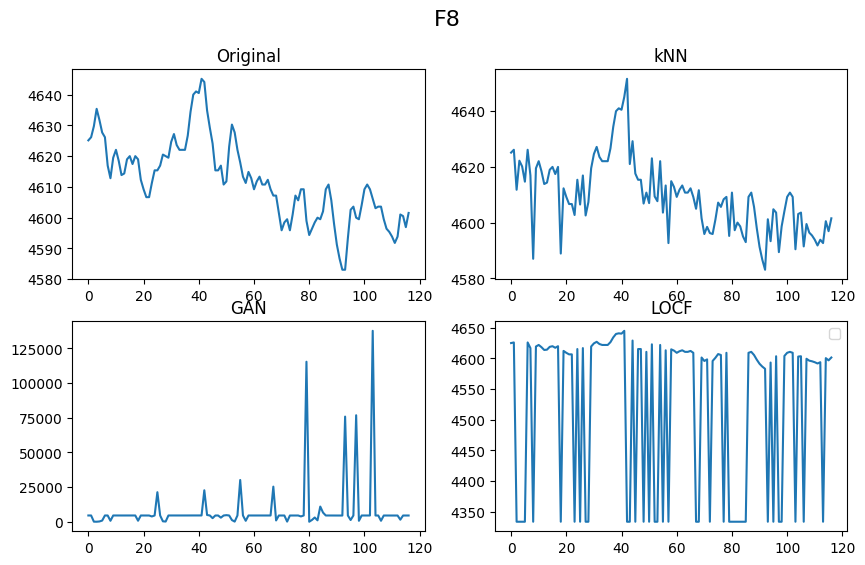

Name F8
Type Original
Mean 4612.022393162393
Variance 169.62164555482528
Max Diff 0.0
Name F8
Type kNN
Mean 4609.542022792023
Variance 169.27844937459952
Max Diff 30.080000000000837
Name F8
Type GAN
Mean 7978.014343481027
Variance 350351546.11682296
Max Diff 133038.82915139577
Name F8
Type LOCF
Mean 4612.3139743589745
Variance 146.03299438965564
Max Diff 14.86999999999989


IndexError: index 128 is out of bounds for axis 0 with size 128

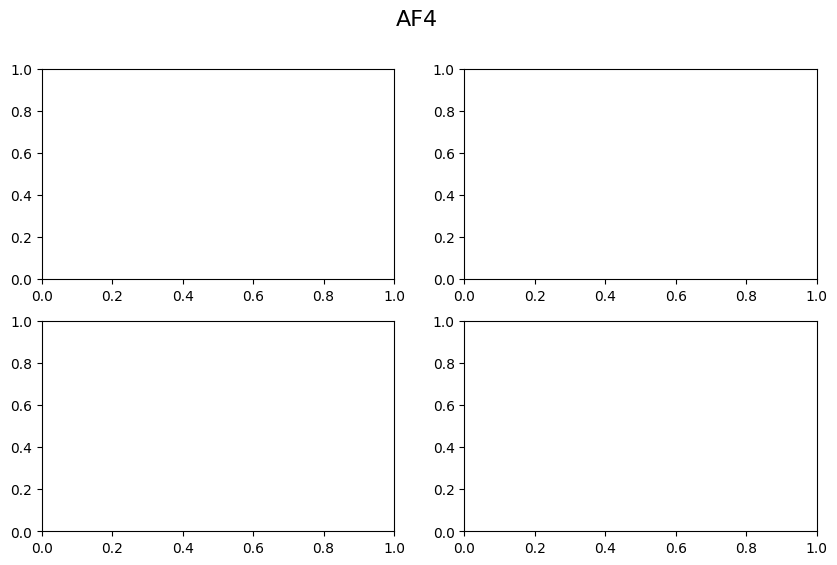

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

col_arr = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1',
           'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'Timestamp']

df = pd.DataFrame(columns=['Name', 'Type', 'Mean', 'Variance', 'Max Diff', 'Num Diffs'])
for i in range(15):

  fig, axs = plt.subplots(2, 2,figsize=(10, 6))
  fig.suptitle(f'{col_arr[i]}', fontsize=16)

  n = random.randint(0,128)

  axs[0,0].plot(X1[n, :, i])
  axs[0,0].set_title('Original')
  axs[0,1].plot(X2[n, :, i])
  axs[0,1].set_title('kNN')
  axs[1,0].plot(X3[n, :, i])
  axs[1,0].set_title('GAN')
  axs[1,1].plot(X4[n, :, i])
  axs[1,1].set_title('LOCF')
  plt.legend()
  plt.show()

  for method in ['Original', 'kNN', 'GAN', 'LOCF']:
    if method == 'Original':
      X = X1
    elif method == 'kNN':
      X = X2
    elif method == 'GAN':
      X = X3
    elif method == 'LOCF':
      X = X5

    print(f'Name {col_arr[i]}',
          f'Type {method}',
          f'Mean {X[n,:,i].mean()}',
          f'Variance {X[n,:,i].var()}',
          f'Max Diff {np.max(np.abs(X[n, :, i] - X1[n, :, i]))}', sep='\n')

In [ ]:
TS1 = X1 # original
TS2 = X2 # knn

In [ ]:
if np.allclose(TS1, TS2):
    print("Datasets are identical!")
else:
    print("Datasets differ.")

print("Mean (X1):", np.mean(TS1), "Mean (X2):", np.mean(TS2), "Percent diff:", 100*abs(np.mean(TS1 - TS2))/abs(np.mean(TS1)), '%')
print("Variance (X1):", np.var(TS1), "Variance (X2):", np.var(TS2), "Percent diff:", 100*abs(np.var(TS1 - TS2))/abs(np.var(TS1)), '%')

Datasets differ.
Mean (X1): 62431.59616095397 Mean (X2): 62848.72366850679 Percent diff: 0.6681352603534831 %
Variance (X1): 64345966634.43273 Variance (X2): 62223415247.21272 Percent diff: 6.1525835313684 %


In [ ]:
# datasets = {
#     'original': X.to_numpy(),                         X1
#     'kNN-MCAR': knn_data_mcar,                        X2
#     'kNN-MAR': knn_data_mar,
#     'kNN-MNAR': knn_data_mnar,
#     'interpolation-MCAR': interpolated_data_mcar,     X3
#     'interpolation-MAR': interpolated_data_mar,
#     'interpolation-MNAR': interpolated_data_mnar,
#     'LOCF-MCAR': locf_data_mcar,                      X4
#     'LOCF-MAR': locf_data_mar,
#     'LOCF-MNAR': locf_data_mnar,
#     'GAN-MCAR': gan_data_mcar,                        X5
#     'GAN-MAR': gan_data_mar,
#     'GAN-MNAR': gan_data_mnar,
# }

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
X1.shape

(128, 117, 15)

In [ ]:
num_samples = 50
size_samp = 5
output_dict = {}

In [ ]:
null_distances = []
for sample in tqdm(range(num_samples)):
    samp1, samp2 = [], []
    rsam = random.randint(0, 14)  # Assuming 15 sensors (0-14)
    for i in range(size_samp):
        rts1 = random.randint(0, num_series - 1)
        rts2 = random.randint(0, num_series - 1)
        samp1.extend(X1[rts1, :, rsam])
        samp2.extend(X1[rts2, :, rsam])
    dgm1 = get_persistence(samp1, verbose=False)
    dgm2 = get_persistence(samp2, verbose=False)
    null_distances.append(bottleneck_dist(dgm1[0], dgm2[0]))

null_distribution = np.array(null_distances)

100%|██████████| 50/50 [00:43<00:00,  1.16it/s]


In [ ]:
for method in ['kNN-MCAR', 'interpolation-MCAR', 'LOCF-MCAR', 'GAN-MCAR',
               'kNN-MAR', 'interpolation-MAR', 'LOCF-MAR', 'GAN-MAR']:
    output_dist = []
    TS = datasets[method][:num_series * 117].reshape(num_series, 117, 15)
    for sample in tqdm(range(num_samples)):
        # Sample from original and method
        samp1, samp2 = [], []
        rsam = random.randint(0, 14)
        for i in range(size_samp):
            rts = random.randint(0, num_series - 1)
            samp1.extend(X1[rts, :, rsam])
            samp2.extend(TS[rts, :, rsam])
        # Compute persistence and distance
        dgm1 = get_persistence(samp1)
        dgm2 = get_persistence(samp2)
        output_dist.append(bottleneck_dist(dgm1[0], dgm2[0]))
    output_dict[method] = output_dist

    #print(bottleneck_dist((dgm1, samp1), (dgm2, samp2)))
    # get_persistence(samp1, verbose=False)


100%|██████████| 50/50 [00:32<00:00,  1.52it/s]


In [ ]:
results = {}
for method, distances in output_dict.items():
    observed_mean = np.mean(distances)
    # One-tailed test: fraction of null distances >= observed_mean
    p_value = (np.sum(null_distribution >= observed_mean) + 1) / (len(null_distribution) + 1)
    results[method] = {'mean': observed_mean, 'p_value': p_value}

In [ ]:
results = {}
for method, distances in output_dict.items():
    observed_mean = np.mean(distances)
    p_value = monte_carlo_pvalue(observed_mean, null_distribution)
    results[method] = {'mean': observed_mean, 'p_value': p_value}

In [ ]:
methods = list(results.keys())
raw_p = [results[method]['p_value'] for method in methods]

In [ ]:
report = []
for method in methods:
    report.append({
        'Method': method,
        'Mean Distance': results[method]['mean'],
        'Raw p-value': results[method]['p_value'],
        'Significant (α=0.05)': results[method]['p_value'] < 0.05
    })

In [ ]:
df_report = pd.DataFrame(report)
print(df_report)

               Method  Mean Distance  Raw p-value  Significant (α=0.05)
0            kNN-MCAR   40053.281818     0.122369                 False
1  interpolation-MCAR      84.684459     0.422406                 False
2           LOCF-MCAR    8771.046754     0.133269                 False
3            GAN-MCAR   38673.675511     0.122599                 False
4             kNN-MAR   26783.218801     0.127189                 False
5   interpolation-MAR    9176.805553     0.133939                 False
6            LOCF-MAR   20023.467581     0.131719                 False
7             GAN-MAR   95740.791075     0.105439                 False


# testing code

In [ ]:
import plotly.graph_objects as go
x_nonperiodic = np.linspace(0, 117, 117)
y_nonperiodic = X1[0:3,:,0].flatten()

fig = go.Figure(data=go.Scatter(x=x_nonperiodic, y=y_nonperiodic))
fig.update_layout(xaxis_title="Timestamp", yaxis_title="Amplitude")
fig.show()

In [ ]:
from gtda.time_series import SingleTakensEmbedding

embedding_dimension_nonperiodic = 3
embedding_time_delay_nonperiodic = 16
stride = 3

embedder_nonperiodic = SingleTakensEmbedding(
    parameters_type="fixed",
    n_jobs=2,
    time_delay=embedding_time_delay_nonperiodic,
    dimension=embedding_dimension_nonperiodic,
    stride=stride,
)

y_nonperiodic_embedded = embedder_nonperiodic.fit_transform(y_nonperiodic)

plot_point_cloud(y_nonperiodic_embedded)

In [ ]:
y_nonperiodic_embedded.shape
y_nonperiodic_embedded = y_nonperiodic_embedded[None, :, :]

In [ ]:
from gtda.homology import VietorisRipsPersistence

# 0 - connected components, 1 - loops, 2 - voids
homology_dimensions = [0, 1, 2]

nonperiodic_persistence = VietorisRipsPersistence(
    homology_dimensions=homology_dimensions, n_jobs=6
)
print("Persistence diagram for nonperiodic signal")
nonperiodic_persistence.fit_transform_plot(y_nonperiodic_embedded);

Persistence diagram for nonperiodic signal


In [ ]:
max_embedding_dimension = 30
max_time_delay = 30
stride = 5

embedder_periodic = SingleTakensEmbedding(
    parameters_type="search",
    time_delay=max_time_delay,
    dimension=max_embedding_dimension,
    stride=stride,
)

In [ ]:
def fit_embedder(embedder: SingleTakensEmbedding, y: np.ndarray, verbose: bool=True) -> np.ndarray:
    """Fits a Takens embedder and displays optimal search parameters."""
    y_embedded = embedder.fit_transform(y)

    if verbose:
        print(f"Shape of embedded time series: {y_embedded.shape}")
        print(
            f"Optimal embedding dimension is {embedder.dimension_} and time delay is {embedder.time_delay_}"
        )

    return y_embedded

In [ ]:
y_nonperiodic_embedded = fit_embedder(embedder_periodic, y_nonperiodic_embedded)

ValueError: Found array with dim 3. None expected <= 2.

In [ ]:
embedder = SingleTakensEmbedding(
    parameters_type="search", time_delay=time_delay, dimension=embedding_dimension,
)

NameError: name 'time_delay' is not defined

---

In [ ]:
r1 = np.random.choice(num_series, num_series, replace=True)
r1 = random.randint(0,128)
for m in ['Original', 'LOCF', 'kNN', 'GAN']:
  print(input_dict[m][r1])
  M, filter_values = mapper_time_series(input_dict[m][r1], res=100, gain=0.4)
  G = M.get_networkx()
  print(f"{m} # of nodes: {len(G.nodes())}")
  print(f"{m} # of edges: {len(G.edges())}")

[[   4274.36    3983.08    4260.   ...    4598.97    4335.38 1587924.  ]
 [   4281.03    3986.15    4259.49 ...    4606.15    4336.41 1588041.  ]
 [   4294.36    3991.79    4268.72 ...    4607.18    4342.05 1588158.  ]
 ...
 [   4288.72    4012.82    4262.56 ...    4584.62    4335.38 1601262.  ]
 [   4283.08    4009.23    4250.26 ...    4583.59    4331.28 1601379.  ]
 [   4280.      4006.15    4246.67 ...    4589.74    4331.28 1601496.  ]]
Original # of nodes: 0
Original # of edges: 0
[[   4274.36    3983.08    4260.   ...    4598.97    4333.33 1587924.  ]
 [   4281.03    3986.15    4259.49 ...    4333.33    4333.33 1588041.  ]
 [   4294.36    3991.79    4333.33 ...    4607.18    4333.33 1588158.  ]
 ...
 [   4288.72    4333.33    4333.33 ...    4333.33    4335.38    4333.33]
 [   4283.08    4333.33    4250.26 ...    4583.59    4333.33 1601379.  ]
 [   4333.33    4006.15    4333.33 ...    4589.74    4333.33 1601496.  ]]
LOCF # of nodes: 0
LOCF # of edges: 0
[[   4274.36          3983.0

In [ ]:
M1, fil1 = mapper_time_series(input_dict['Original'][r1], res=10, gain=0.1)
dgm1, _ = compute_topological_features(M1)
print("Persistence diagram for X1:", dgm1)
M2, fil2 = mapper_time_series(input_dict['kNN'][r1], res=10, gain=0.1)
dgm2, _ = compute_topological_features(M2)
print("Persistence diagram for X2:", dgm2)

Persistence diagram for X1: [(0, (np.float64(0.3049798927461516), np.float64(0.3049798927461516))), (0, (np.float64(2.3859908218688584), np.float64(2.3859908218688584))), (0, (np.float64(-2.007254534670988), np.float64(-2.007254534670988))), (0, (np.float64(1.6923205420244865), np.float64(1.6923205420244865))), (0, (np.float64(2.308916426747652), np.float64(2.308916426747652))), (0, (np.float64(2.154767416677687), np.float64(2.154767416677687))), (0, (np.float64(0.6132777946899222), np.float64(0.6132777946899222))), (0, (np.float64(-0.19600422052121105), np.float64(-0.19600422052121105))), (0, (np.float64(1.3842237935911905), np.float64(1.3842237935911905))), (0, (np.float64(1.268410907656937), np.float64(1.268410907656937))), (0, (np.float64(-1.4291959383409065), np.float64(-1.4291959383409065))), (0, (np.float64(-1.159435249318284), np.float64(-1.159435249318284))), (0, (np.float64(0.1508309285696554), np.float64(0.1508309285696554))), (0, (np.float64(-1.583344884638748), np.float64(

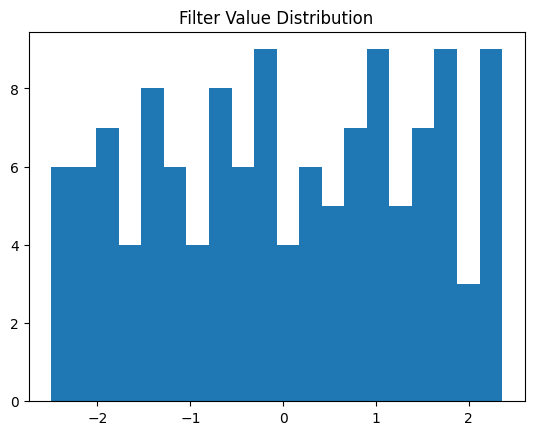

In [ ]:
plt.hist(fil1[:, 0], bins=20)
plt.title("Filter Value Distribution")
plt.show()

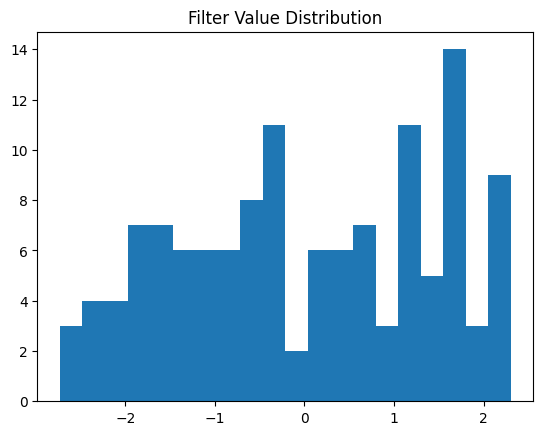

In [ ]:
plt.hist(fil2[:, 0], bins=20)
plt.title("Filter Value Distribution")
plt.show()

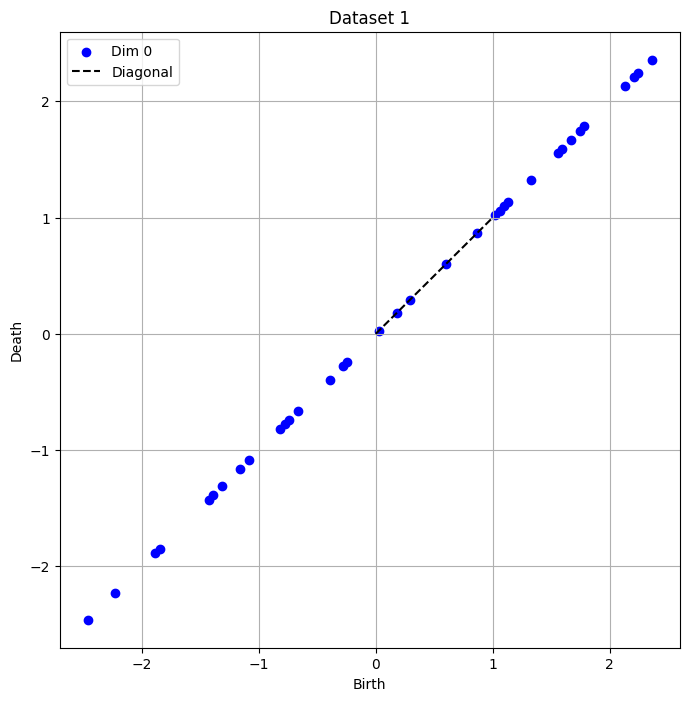

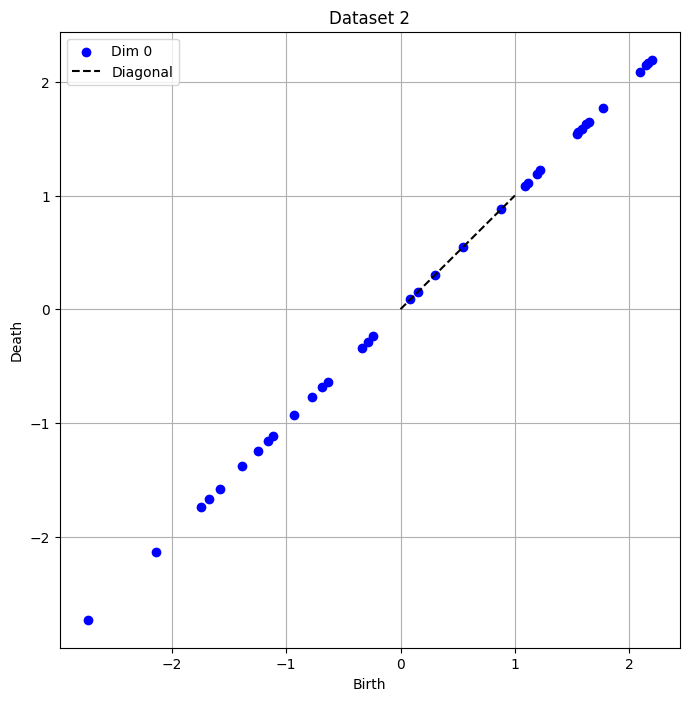

In [ ]:
plot_persistence_diagram(dgm1, "Dataset 1")
plot_persistence_diagram(dgm2, "Dataset 2")

In [ ]:
len(dgm1), len(dgm2)

(35, 35)

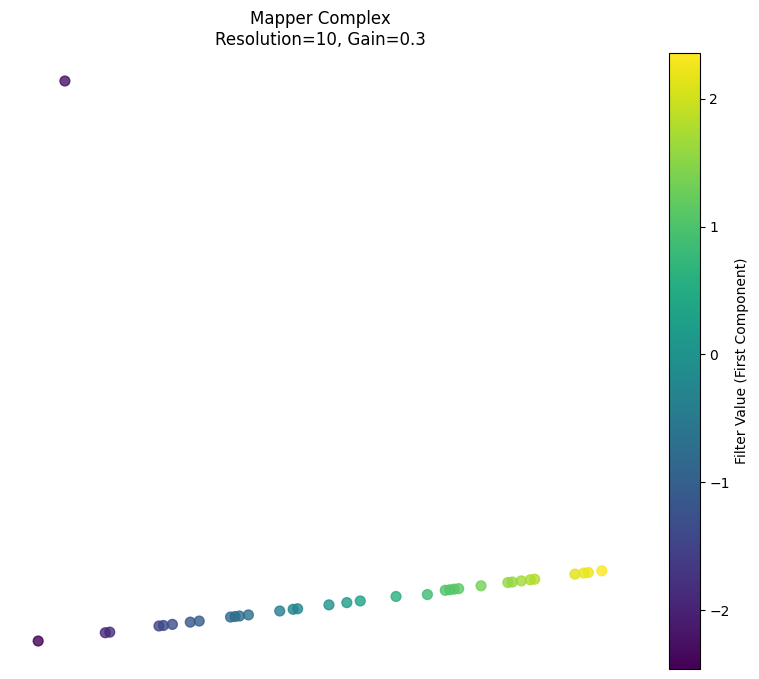

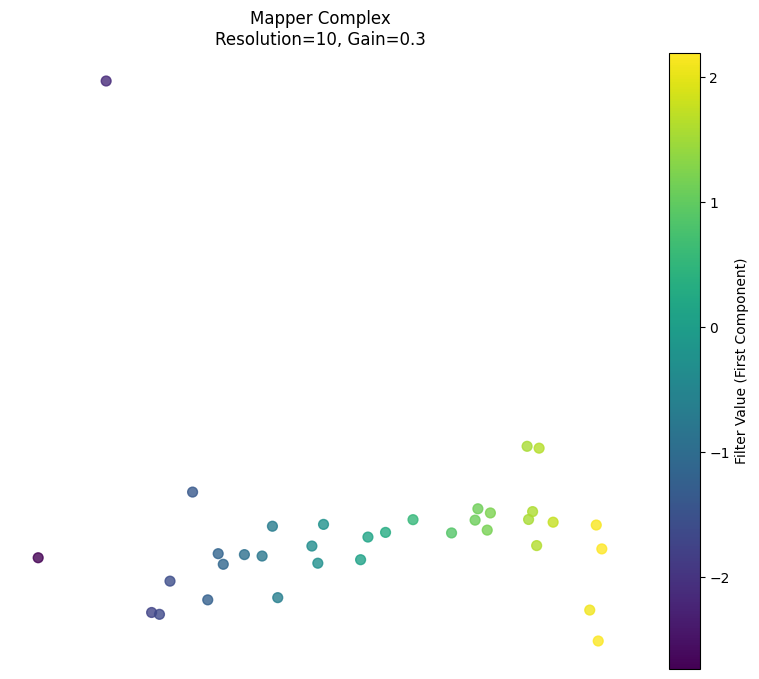

In [ ]:
visualize_mapper(M1, fil1, res=10, gain=0.3)
visualize_mapper(M2, fil2, res=10, gain=0.3)

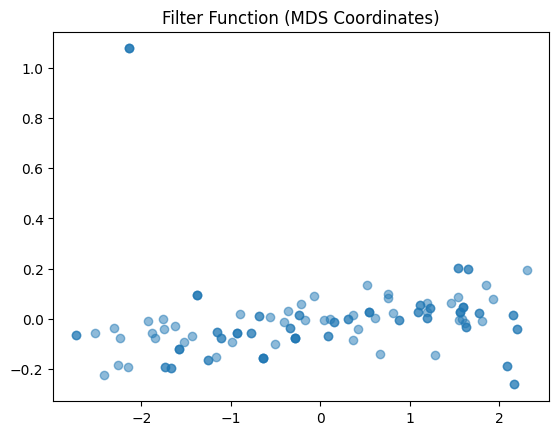

In [ ]:
plt.scatter(fil2[:, 0], fil2[:, 1], alpha=0.5)
plt.title("Filter Function (MDS Coordinates)")
plt.show()

In [ ]:
bottleneck_dist((M1,fil1), (M2,fil2))

inf

In [ ]:
# Generate synthetic data with a clear loop
theta = np.linspace(0, 2*np.pi, 100)
X_circle = np.column_stack([np.cos(theta), np.sin(theta)]) + 0.05 * np.random.randn(100, 2)
X_line = np.column_stack([np.linspace(0, 1, 100), np.zeros(100)])

# Compute Mapper complexes with tuned parameters
M_circle, _ = mapper_time_series(X_circle.reshape(100, 1, 2), res=5, gain=0.3)
M_line, _ = mapper_time_series(X_line.reshape(100, 1, 2), res=5, gain=0.3)

# Compute persistence diagrams (lower threshold)
dgm_circle, _ = compute_topological_features(M_circle, threshold=1e-5)
dgm_line, _ = compute_topological_features(M_line, threshold=1e-5)

# Convert to NumPy arrays and filter noise
dgm_circle_np = np.array([[b, d] for (dim, (b, d)) in dgm_circle if abs(b - d) > 1e-5], dtype=np.float64)
dgm_line_np = np.array([[b, d] for (dim, (b, d)) in dgm_line if abs(b - d) > 1e-5], dtype=np.float64)

# Compute bottleneck distance
if len(dgm_circle_np) == 0 or len(dgm_line_np) == 0:
    print("Adjust parameters: No features detected!")
else:
    distance = gd.bottleneck_distance(dgm_circle_np, dgm_line_np)
    print(f"Bottleneck distance: {distance}")

IndexError: index 100 is out of bounds for axis 0 with size 100